# Retail Transaction Data Analysis - Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
from itertools import product

## 1 Feature engineering

Here, you are going to create features from a very simple dataset: retail transaction data from Kaggle. The dataset provides the customer ID, date of the transaction and transaction amount as shown in the table below. Although this may look like a very simple dataset, you will build a wide range of features. The features will then be used as inputs in several models in upcoming assignments, in which you will try to predict the client’s response to a promotion campaign.

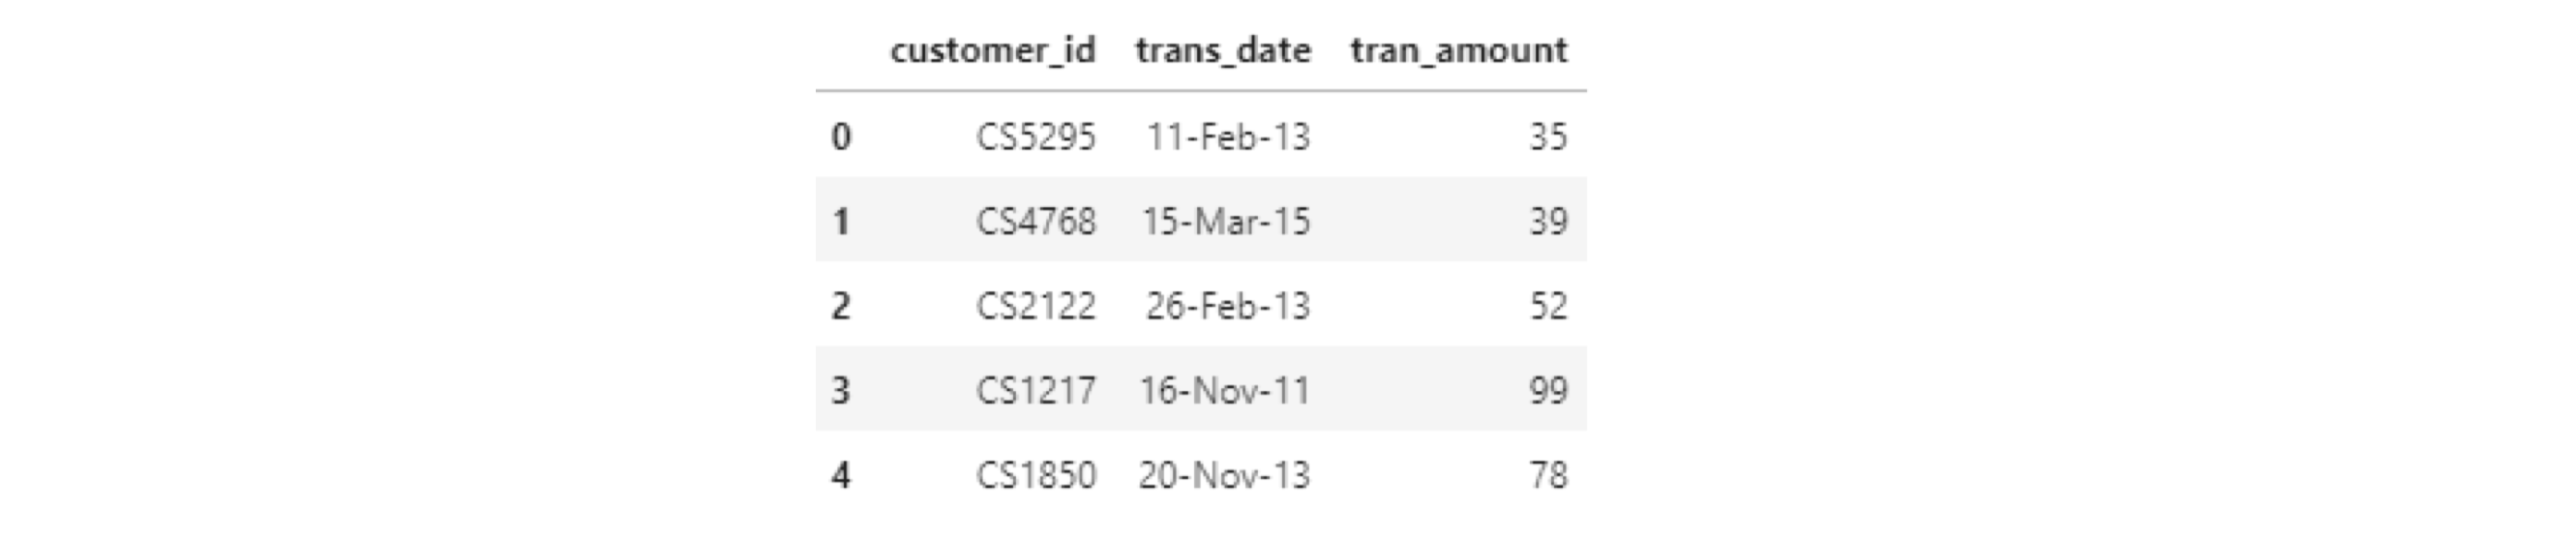

### 1.1 Import the data and create the anchor date columns

In order to create features, you need to create some anchor dates. The most typical for transaction data is the end of the month and the year.

1. Import the dataset as **txn** and identify the number of rows.

    **Answer:** The number of rows is 125000.

In [2]:
txn = pd.read_csv('Retail_Data_Transactions.csv')
txn

customer_id trans_date  tran_amount
0           CS5295  11-Feb-13           35
1           CS4768  15-Mar-15           39
2           CS2122  26-Feb-13           52
3           CS1217  16-Nov-11           99
4           CS1850  20-Nov-13           78
...            ...        ...          ...
124995      CS8433  26-Jun-11           64
124996      CS7232  19-Aug-14           38
124997      CS8731  28-Nov-14           42
124998      CS8133  14-Dec-13           13
124999      CS7996  13-Dec-14           36

[125000 rows x 3 columns]

In [3]:
print("The number of rows is {}".format(txn.shape[0]))

The number of rows is 125000


2. The date-format in column 'trans_date' is not standard. Create a new column 'txn_date' from 'trans_date' with pd.to_datetime and drop the column 'trans_date'.

In [4]:
txn['txn_date'] = pd.to_datetime(txn['trans_date'])
txn.drop('trans_date', axis=1, inplace=True)
txn.head()

customer_id  tran_amount   txn_date
0      CS5295           35 2013-02-11
1      CS4768           39 2015-03-15
2      CS2122           52 2013-02-26
3      CS1217           99 2011-11-16
4      CS1850           78 2013-11-20

3. Identify the min() and max() of column 'txn_date'.

    **Answer:** The min() of column 'txn_date' is 2011-05-16 00:00:00 and the max() of column 'txn_date' is 2015-03-16 00:00:00.

In [5]:
min_date = min(txn['txn_date'])
max_date = max(txn['txn_date'])
print("The min() of column 'txn_date' is {}".format(min_date))
print("The max() of column 'txn_date' is {}".format(max_date))

The min() of column 'txn_date' is 2011-05-16 00:00:00
The max() of column 'txn_date' is 2015-03-16 00:00:00


4. Create the column 'ME_DT': the last day of the month in the 'trans_date' column. DateOﬀset objects is a simple way to do this in pandas.

In [6]:
txn['ME_DT'] = txn['txn_date'] + MonthEnd(0)
txn.iloc[55:60]

customer_id  tran_amount   txn_date      ME_DT
55      CS2662           88 2014-08-31 2014-08-31
56      CS2209           35 2012-03-12 2012-03-31
57      CS4530           40 2011-06-05 2011-06-30
58      CS2848           53 2013-02-04 2013-02-28
59      CS2596           55 2011-09-19 2011-09-30

5. Create the column 'YEAR': the year in the 'trans_date' column. DatetimeIndex with attribute .year will help you do so.

In [7]:
txn['YEAR'] = pd.DatetimeIndex(txn['txn_date']).year
txn.iloc[55:60]

customer_id  tran_amount   txn_date      ME_DT  YEAR
55      CS2662           88 2014-08-31 2014-08-31  2014
56      CS2209           35 2012-03-12 2012-03-31  2012
57      CS4530           40 2011-06-05 2011-06-30  2011
58      CS2848           53 2013-02-04 2013-02-28  2013
59      CS2596           55 2011-09-19 2011-09-30  2011



The **table output** should look like the snapshot below. Make sure that the column 'ME_DT' works as expected. E.g. for the ﬁrst line 'trans_date': 2018-08-31 is converted to 2018-08-31. A common mistake in implementing the DateOﬀset transformation is to convert 2018-08-31 to 2018-09-30 (a date that falls on the last day of a month is converted to the last day of the next month!!!).

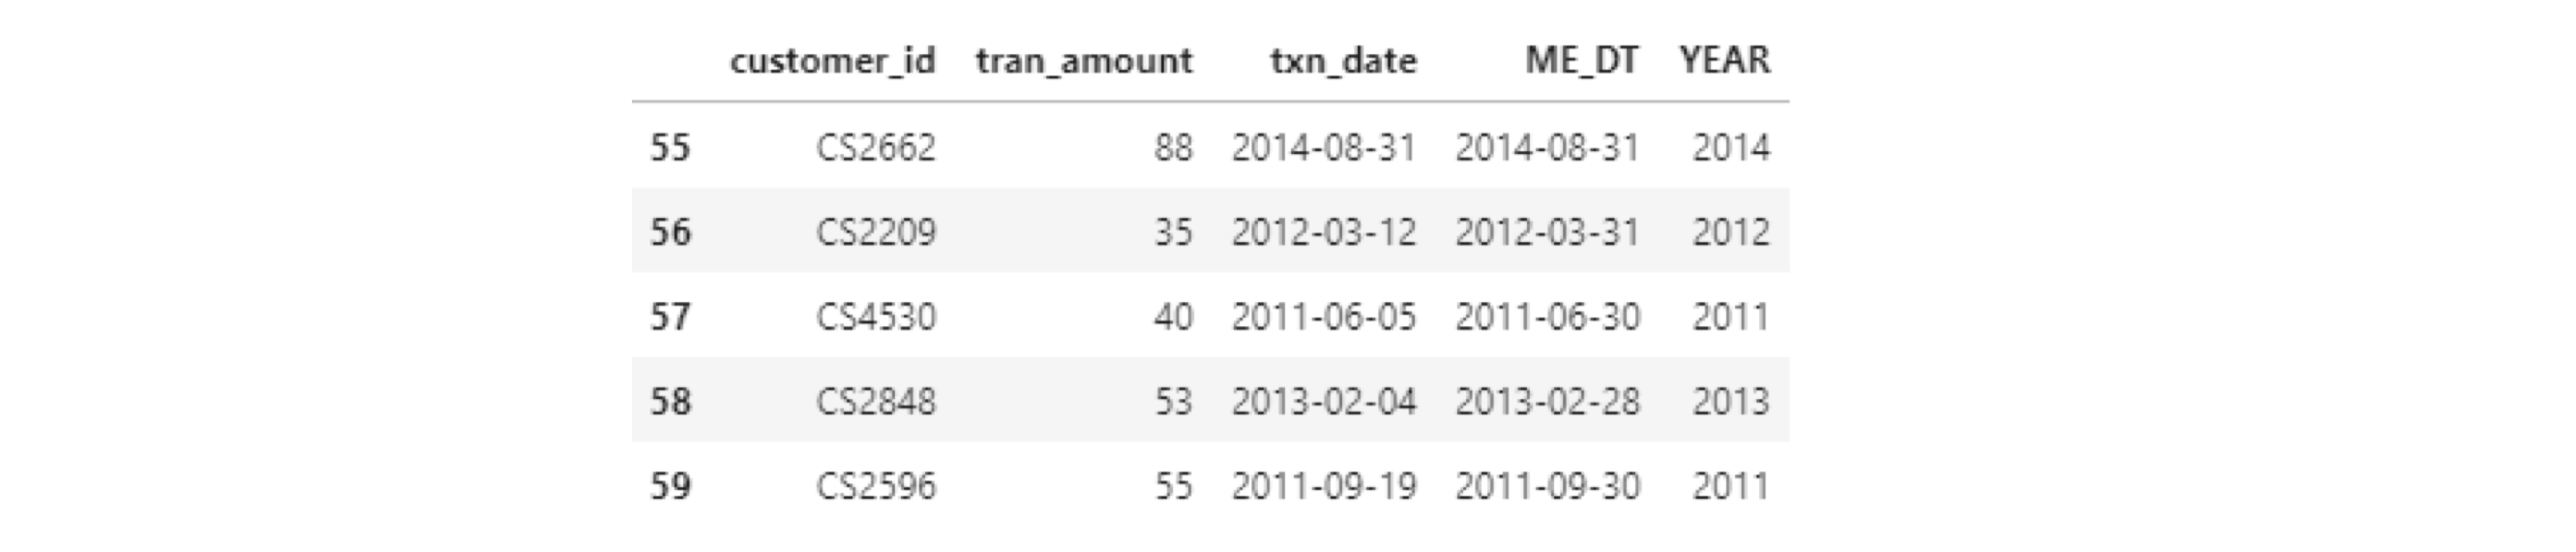

### 1.2 Create features that capture annual spending

Here the approach is to capture the client’s annual spending. The rationale behind this approach is that the clients spend is not very frequent to capture in a monthly aggregation.

1. Using groupby and NamedAgg create **clnt_annual_aggregations**, the annual aggregations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation functions. A snapshot of the output table is shown below. Notice that the output is a typical MultiIndex pandas dataframe.

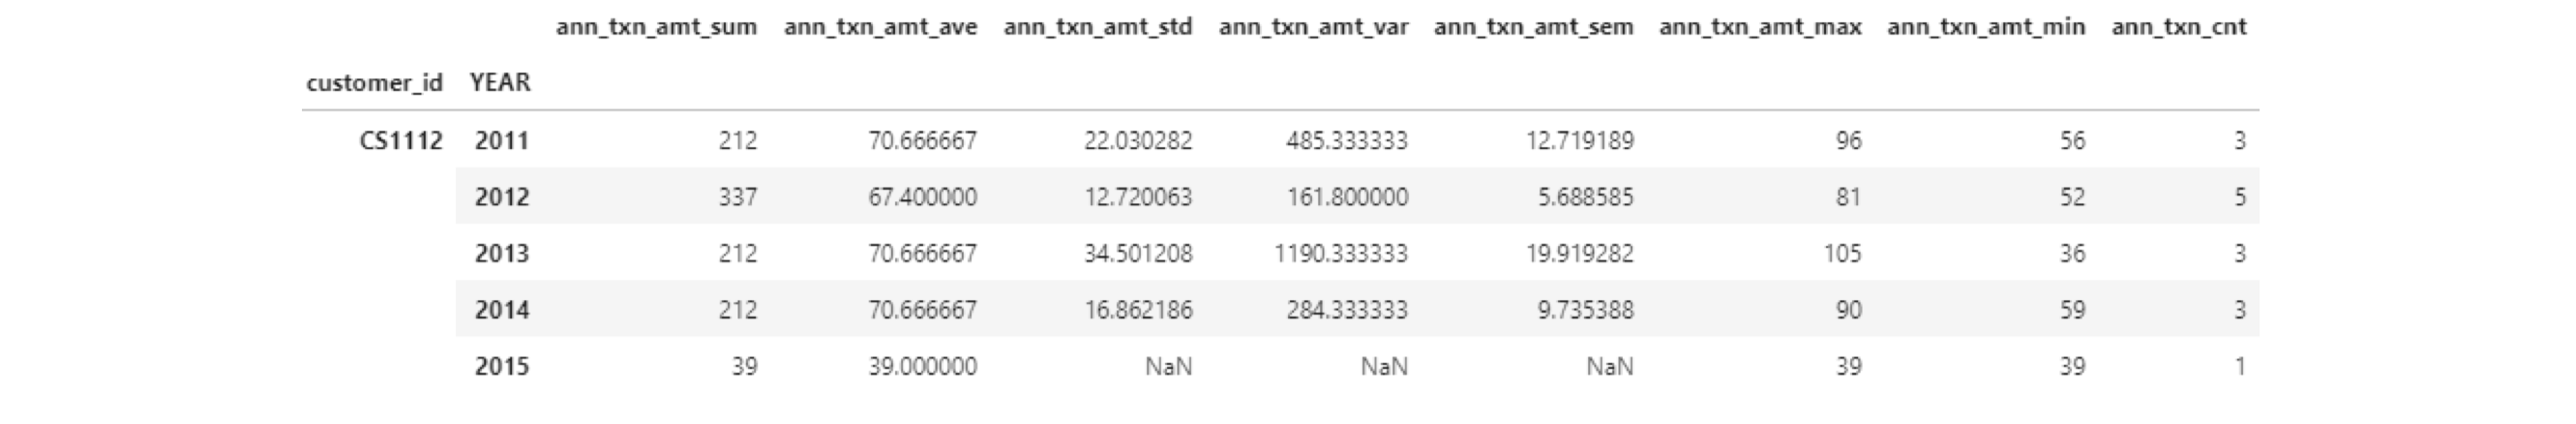

In [8]:
clnt_annual_aggregations = txn.groupby(['customer_id', 'YEAR']).agg(ann_txn_amt_sum = pd.NamedAgg('tran_amount', 'sum'),
                                                                    ann_txn_amt_ave = pd.NamedAgg('tran_amount', 'mean'),
                                                                    ann_txn_amt_std = pd.NamedAgg('tran_amount', 'std'),
                                                                    ann_txn_amt_var = pd.NamedAgg('tran_amount', 'var'),
                                                                    ann_txn_amt_sem = pd.NamedAgg('tran_amount', 'sem'),
                                                                    ann_txn_amt_max = pd.NamedAgg('tran_amount', 'max'),
                                                                    ann_txn_amt_min = pd.NamedAgg('tran_amount', 'min'),
                                                                    ann_txn_cnt = pd.NamedAgg('tran_amount', 'count'))
clnt_annual_aggregations

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id YEAR                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1  
...                           ...          ...  
CS9000      2011               16            2  
            2012               37            4  
            2013               71            2  
            2014               16            4  
            2015               34            1  

[31140 rows x 8 columns]

2. Plot the histogram of the sum and count.

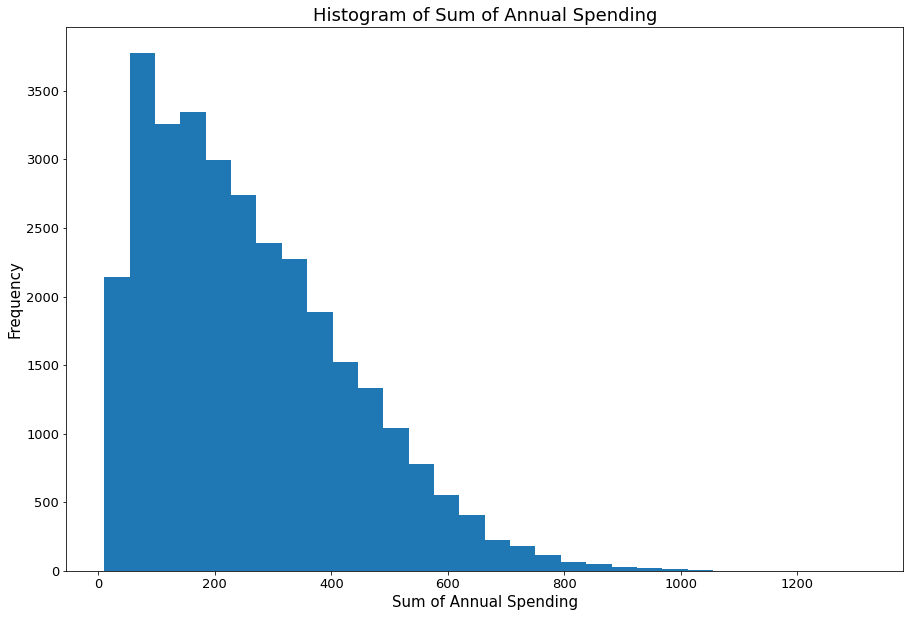

In [9]:
# plot the histogram of sum
plt.figure(figsize=(15,10))
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'], bins = 30)
plt.title("Histogram of Sum of Annual Spending", fontsize=18)
plt.xlabel("Sum of Annual Spending",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

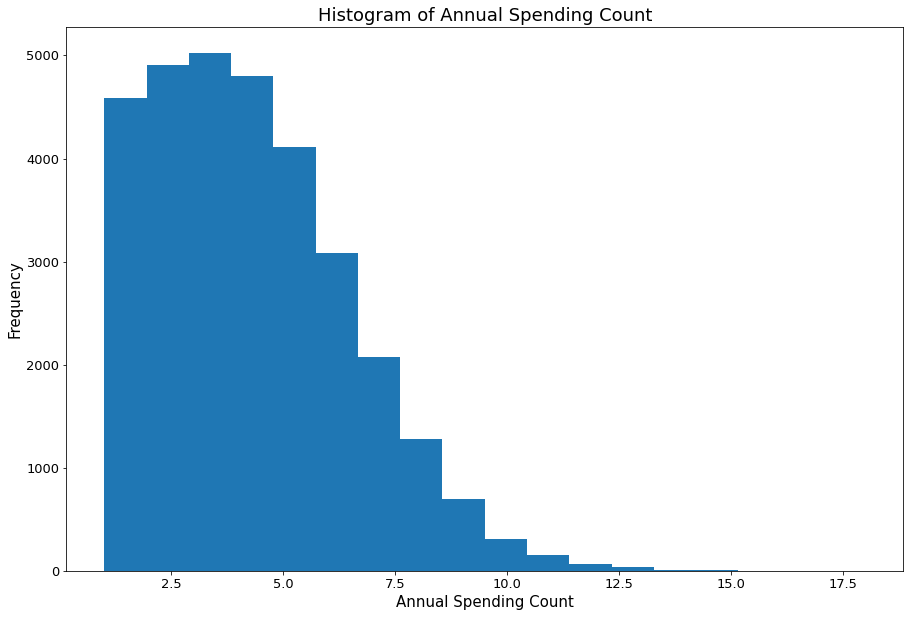

In [10]:
# plot the histogram of count
plt.figure(figsize=(15,10))
plt.hist(clnt_annual_aggregations['ann_txn_cnt'], bins=18)
plt.title("Histogram of Annual Spending Count", fontsize=18)
plt.xlabel("Annual Spending Count",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

3. Reset the index and reshape the table with the pivot_table function to create the **clnt_annual_aggregations_pivot** table shown below with 40 columns (why 40?).

    You should expect columns with NaN values. Impute the NaN entries when you perform the pivot table function and explain your choice of values.
    
    **Answer:** There are 40 columns because there are 8 aggregation parameters in the first dataframe and 5 years in the second dataframe. After pivoting, there should be 8x5=40 columns in total. I filled the NaN entries with the value of 0. The NaN values are due to customer only have one or less transaction in a year, then there are no enough samples to compute the aggregation parameters (std, var, sem). Therefore, I choose to use the value of 0 to replace the NaN values.

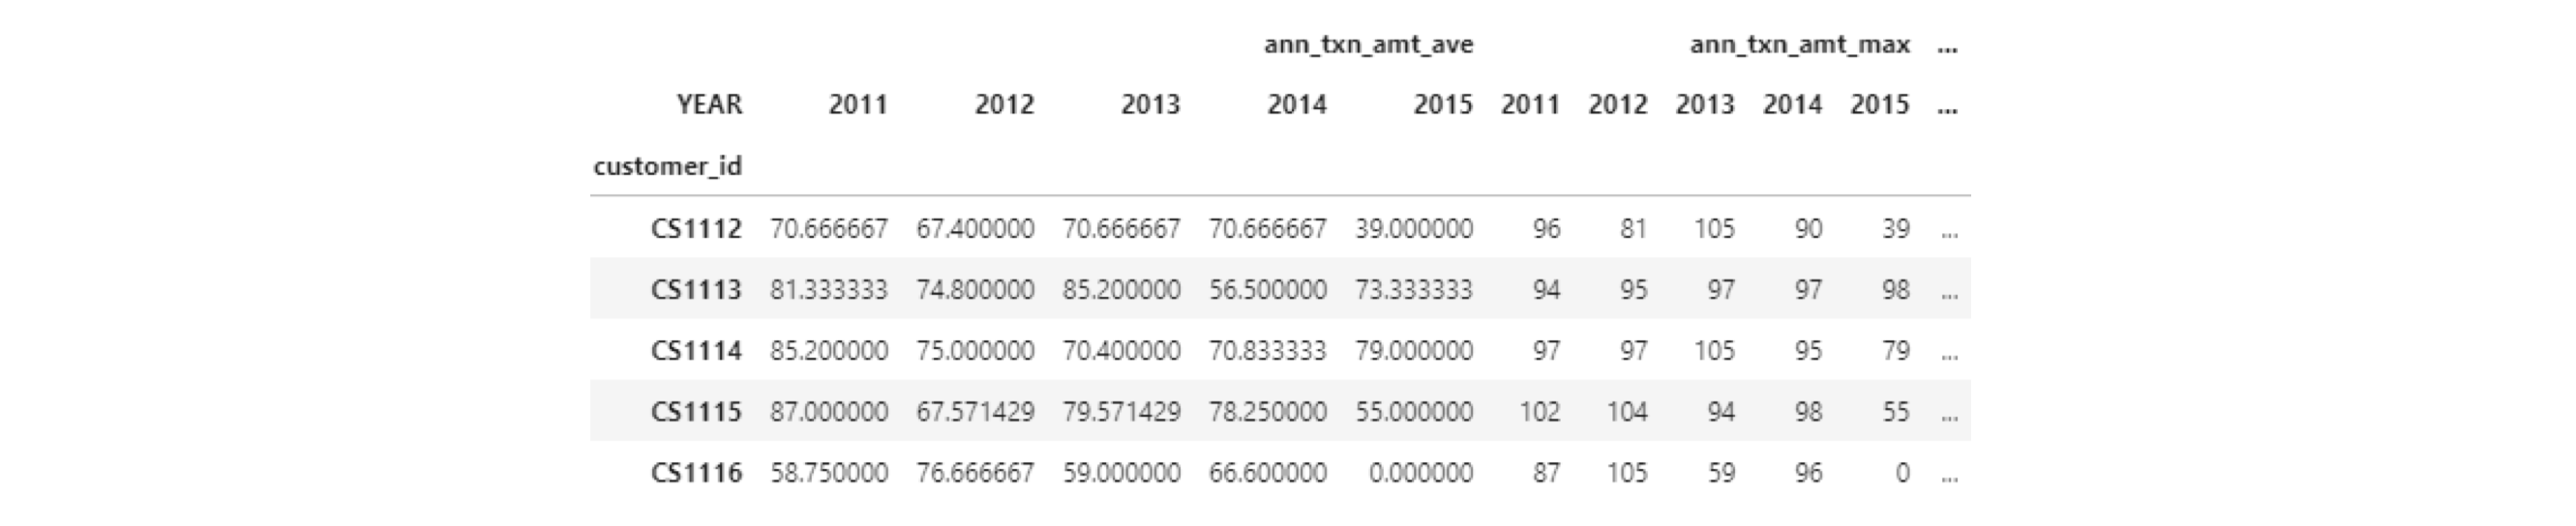

In [11]:
clnt_annual_aggregations_pivot = pd.pivot_table(clnt_annual_aggregations, index='customer_id',
                                                columns='YEAR', fill_value=0)
clnt_annual_aggregations_pivot

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000   0.000000   
CS8997            45.000000  39.500000  35.166667  42.000000   0.000000   
CS8998            64.000000  54.400000  47.000000  32.500000   0.000000   
CS8999            52.000000  25.250000  28.000000  21.000000   0.000000   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_max                      ... ann_txn_amt_var  \
YEAR                   2011 2012 2013 2014 2015  ...            2011   
customer_id                                      ...                   
CS1112                   96   81  105   90   39  ...      485.333333   
CS1113                   94   95   97   97   98  ...      444.333333   
CS1114                   97   97  105   95   79  ...       94.700000   
CS1115                  102  104   94   98   55  ...      225.000000   
CS1116                   87  105   59   96    0  ...      449.583333   
...                     ...  ...  ...  ...  ...  ...             ...   
CS8996                   38   38   50   79    0  ...       98.000000   
CS8997                   47   49   75   45    0  ...        8.000000   
CS8998                   69   79   75   49    0  ...       50.000000   
CS8999                   64   30   39   24    0  ...      333.000000   
CS9000                   23   77   76   35   34  ...       24.500000   

                                                             ann_txn_cnt       \
YEAR               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333    0.000000           3    5   
CS1113       290.200000   171.200000  781.666667  745.333333           3    5   
CS1114       968.000000   619.300000  726.166667    0.000000           5    2   
CS1115       477.285714   110.952381  512.250000    0.000000           3    7   
CS1116       908.333333     0.000000  636.800000    0.000000           4    3   
...                 ...          ...         ...         ...         ...  ...   
CS8996        20.333333   144.500000  481.600000    0.000000           2    3   
CS8997        45.666667   441.366667   18.000000    0.000000           2    4   
CS8998       505.300000  1568.000000  219.666667    0.000000           2    5   
CS8999        21.583333   103.000000   18.000000    0.000000           3    4   
CS9000       281.333333    12.500000   68.250000    0.000000           2    4   

                            
YEAR        2013 2014 2015  
customer_id                 
CS1112         3    3    1  
CS1113         5    4    3  
CS1114         5    6    1  
CS1115         7    4    1  
CS1116         1    5    0  
...          ...  ...  ...  
CS8996         2    6    0  
CS8997         6    2    0  
CS8998         2    4    0  
CS8999         3    2    0  
CS9000         2    4    1  

[6889 rows x 40 columns]

4. The pivoted object you created is a MultiIndex object with hierarchical indexes. You can see the ﬁrst level (i.e. 0) in the snapshot above with names 'ann_txn_amt_ave', 'ann_txn_amt_max' (and more as indicated by the ...) and the second level (i.e. 1) with names '2011', '2012', etc. You can conﬁrm the multiple levels of the columns with the following two expressions.

    What are your observations regarding the number of levels and the column names?
    
    **Answer:** There are two levels and the columns names are tuples made up of these two levels, and the number of columns is the multiplication of number of elements of the first level and the number of elements of the second level.
    
    `clnt_annual_aggregations_pivot.columns.nlevels`
    
    `clnt_annual_aggregations_pivot.columns`

In [12]:
clnt_annual_aggregations_pivot.columns.nlevels

2

In [13]:
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_amt

5. Finally, you want to save the dataframe **clnt_annual_aggregations_pivot** as an .xlsx ﬁle for future use in the machine learning assignment. To do so, you want to remove the two levels in columns and create a single level with column names: 'ann_txn_amt_ave_2011', 'ann_txn_amt_ave_2012', etc. To do so, use the code snippet below prior to saving the dataframe as an Excel ﬁle.

    `level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)`

    `level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)`

    `clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1`
    
    Describe what each line of code in the box does and save the output dataframe as an Excel ﬁle **annual_features.xlsx**. A snapshot of the desired ﬁnal output is shown below.
    
    **Answer:** The first two lines of code extract column names from the two levels respectively, and the third line of code is to concatenate the column names extracted from the two levels and assign them to the column names of the pivot table.
    
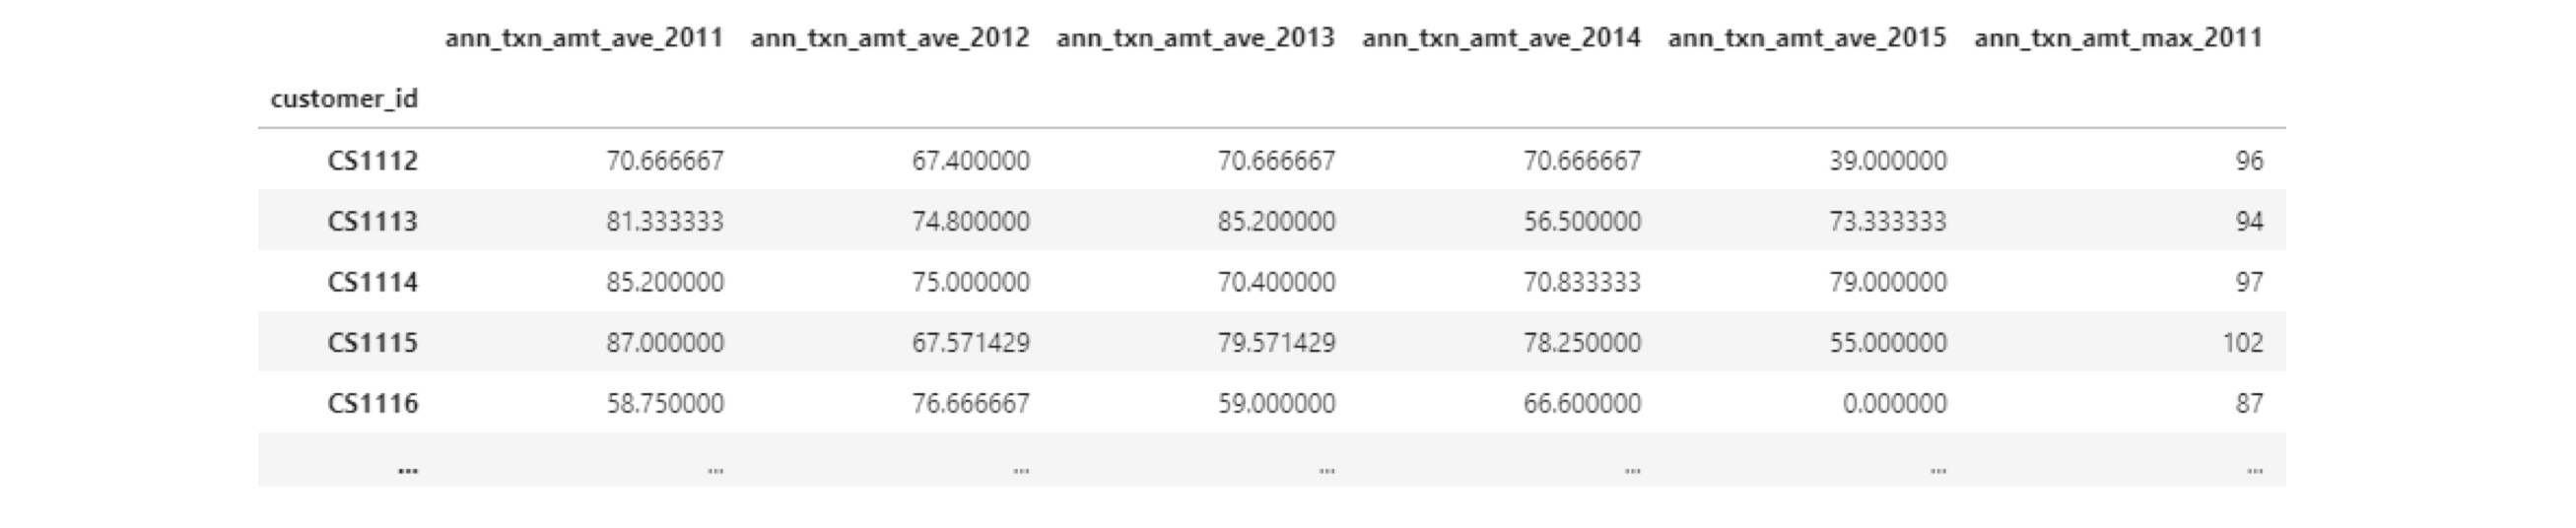

In [14]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_annual_aggregations_pivot

ann_txn_amt_ave_2011  ann_txn_amt_ave_2012  ann_txn_amt_ave_2013  \
customer_id                                                                     
CS1112                  70.666667             67.400000             70.666667   
CS1113                  81.333333             74.800000             85.200000   
CS1114                  85.200000             75.000000             70.400000   
CS1115                  87.000000             67.571429             79.571429   
CS1116                  58.750000             76.666667             59.000000   
...                           ...                   ...                   ...   
CS8996                  31.000000             33.666667             41.500000   
CS8997                  45.000000             39.500000             35.166667   
CS8998                  64.000000             54.400000             47.000000   
CS8999                  52.000000             25.250000             28.000000   
CS9000                  19.500000             54.000000             73.500000   

             ann_txn_amt_ave_2014  ann_txn_amt_ave_2015  ann_txn_amt_max_2011  \
customer_id                                                                     
CS1112                  70.666667             39.000000                    96   
CS1113                  56.500000             73.333333                    94   
CS1114                  70.833333             79.000000                    97   
CS1115                  78.250000             55.000000                   102   
CS1116                  66.600000              0.000000                    87   
...                           ...                   ...                   ...   
CS8996                  56.000000              0.000000                    38   
CS8997                  42.000000              0.000000                    47   
CS8998                  32.500000              0.000000                    69   
CS8999                  21.000000              0.000000                    64   
CS9000                  24.250000             34.000000                    23   

             ann_txn_amt_max_2012  ann_txn_amt_max_2013  ann_txn_amt_max_2014  \
customer_id                                                                     
CS1112                         81                   105                    90   
CS1113                         95                    97                    97   
CS1114                         97                   105                    95   
CS1115                        104                    94                    98   
CS1116                        105                    59                    96   
...                           ...                   ...                   ...   
CS8996                         38                    50                    79   
CS8997                         49                    75                    45   
CS8998                         79                    75                    49   
CS8999                         30                    39                    24   
CS9000                         77                    76                    35   

             ann_txn_amt_max_2015  ...  ann_txn_amt_var_2011  \
customer_id                        ...                         
CS1112                         39  ...            485.333333   
CS1113                         98  ...            444.333333   
CS1114                         79  ...             94.700000   
CS1115                         55  ...            225.000000   
CS1116                          0  ...            449.583333   
...                           ...  ...                   ...   
CS8996                          0  ...             98.000000   
CS8997                          0  ...              8.000000   
CS8998                          0  ...             50.000000   
CS8999                          0  ...            333.000000   
CS9000                         34  ...             24.500000   

             ann_t

In [15]:
# export to excel file
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")  

6. What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section (if any)?

    **Answer:** The possible disadvantages are clinet's transaction behavior may be seasonal which may not be reflected from the annual features.

### 1.3 Create monthly aggregations

Here, you want to explore the **monthly** sum of amounts and count of clients transactions.

1. Create the dataframe that captures the monthly sum and count of transactions per client (name it **clnt_monthly_aggregations**). Use the groupby function with the Named Aggregation feature which was introduced in pandas version 0.25.0. Make sure that you name the columns as shown in the ﬁgure sample.
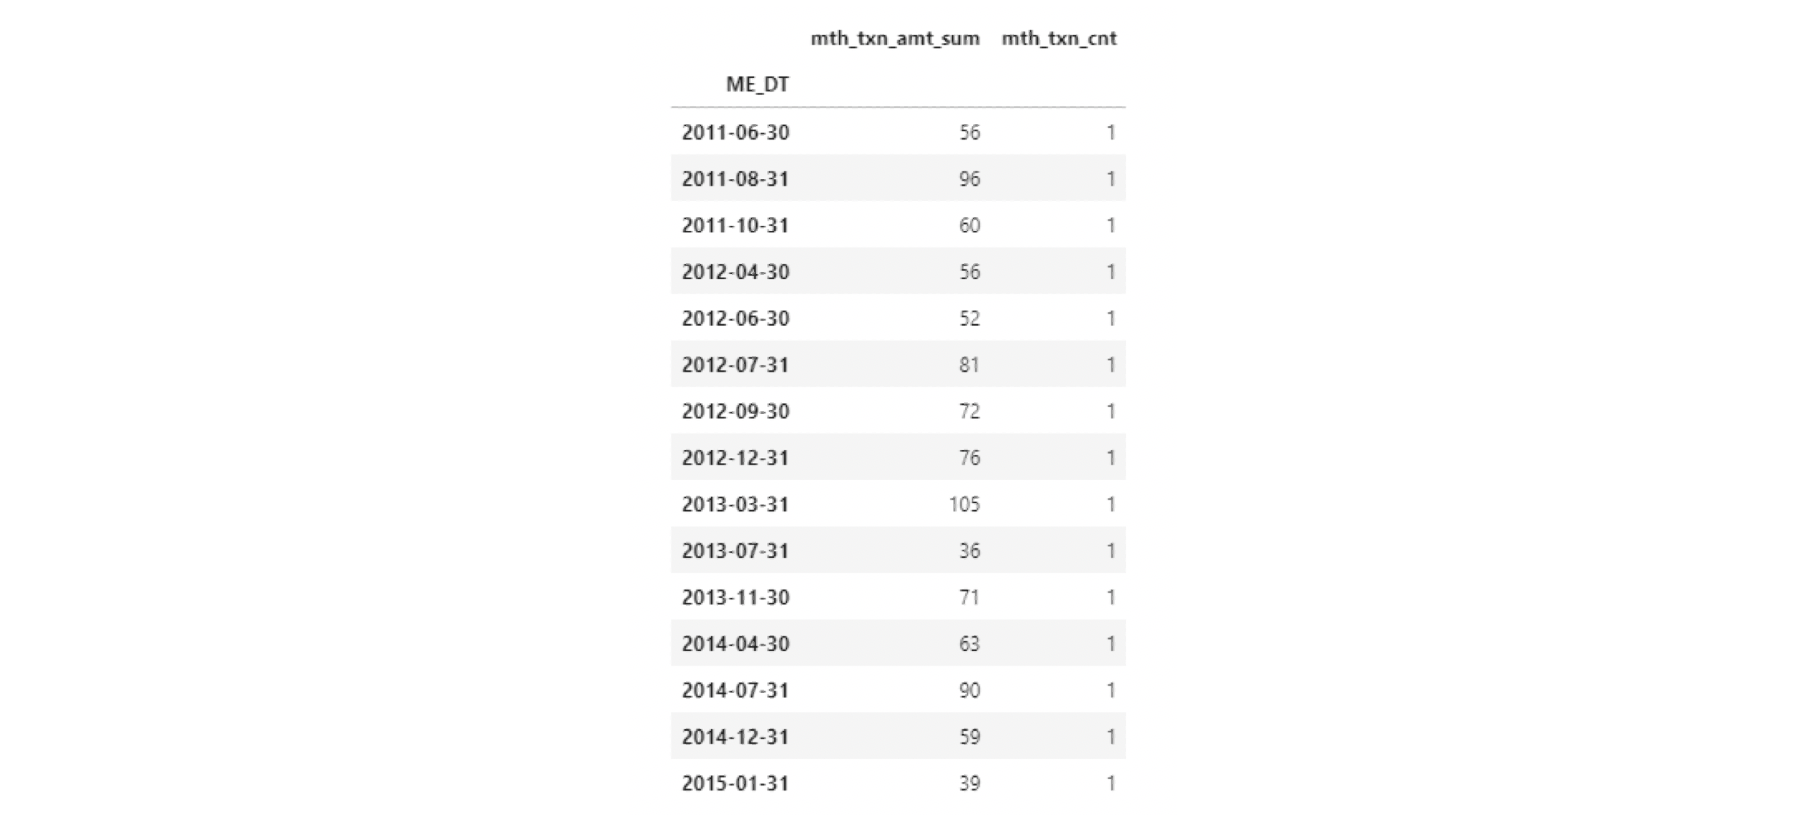

In [16]:
clnt_monthly_aggregations = txn.groupby(['customer_id', 'ME_DT']).agg(mth_txn_amt_sum = pd.NamedAgg('tran_amount', 'sum'),
                                                                      mth_txn_cnt = pd.NamedAgg('tran_amount', 'count'))

clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
...                                 ...          ...
CS9000      2014-01-31               16            1
            2014-05-31               20            1
            2014-07-31               26            1
            2014-08-31               35            1
            2015-02-28               34            1

[103234 rows x 2 columns]

2. Create a histogram of both columns you created. What are your observations? What are the most common and maximum values for each column? How do they compare with the ones in section 1.2?

    **Answer:** 
    - My observations are that most of clients spend approximately 30-100 and have 1 transaction monthly. 
    
    - For the monthly aggregation, the most common vlaue is 77 and the maximum value is 460 for 'mth_txn_amt_sum' column, and for 'mth_txn_cnt' column, the most common vlaue is 1 and maximum value is 6. 
    
    - For the annual aggregation, the most common vlaue is 97 and the maximum value is 1317 for 'ann_txn_amt_sum' column, and for 'ann_txn_cnt' column, the most common vlaue is 3 and maximum value is 8.
    
    - For both transaction sum and count columns, the values are higher from annual aggregation than those from monthly aggregation. However, this is not a linearly relationship. Therefore, it is necessary to investigate clinet's monthly behaviour rather than annual behaviour.

    The **output dataframe** should look like the snapshot shown on the right for client with ID CS1112 (conﬁrm this with slicing your output dataframe).

    Most clients in this dataset shop a few times a year. For example, the client with ’customer_id’ CS1112 shown here made purchases in 15 out of 47 months of data in the txn table. The information in this dataset is ”irregular”; some clients may have an entry for a month, while others do not have an entry (e.g. when they don’t shop for this particular month).

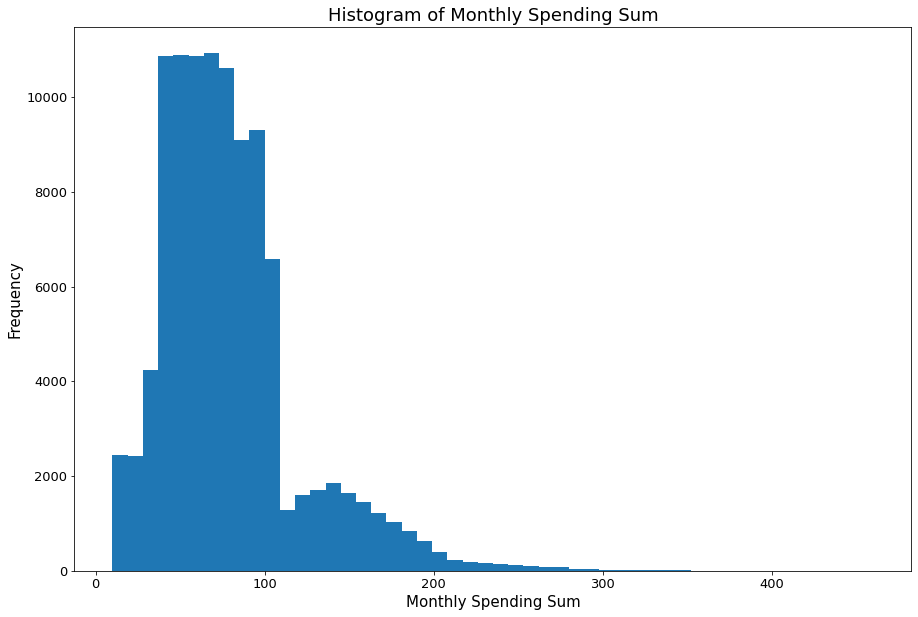

In [17]:
# plot the histogram of sum
plt.figure(figsize=(15,10))
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'], bins=50)
plt.title("Histogram of Monthly Spending Sum", fontsize=18)
plt.xlabel("Monthly Spending Sum",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

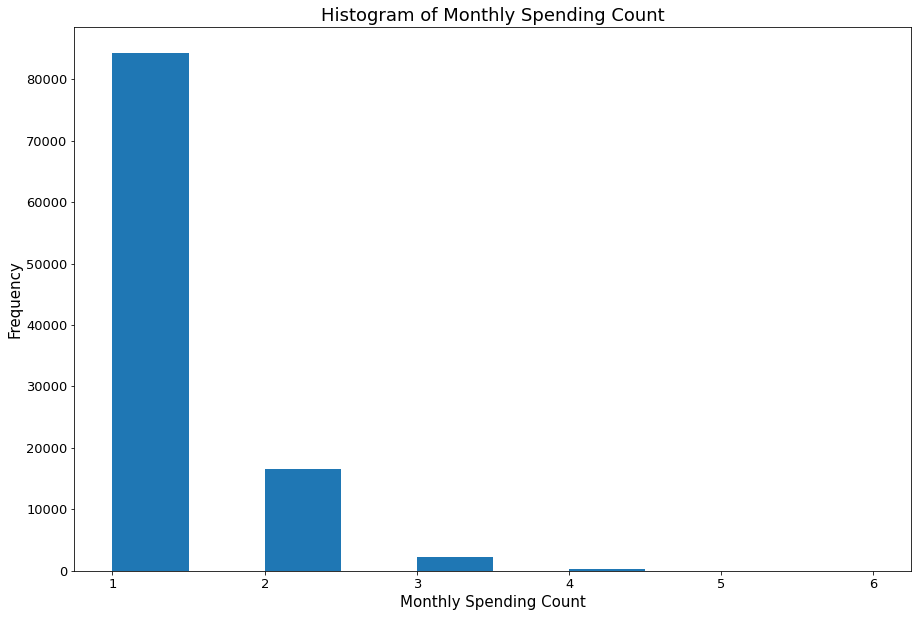

In [18]:
# plot the histogram of count
plt.figure(figsize=(15,10))
plt.hist(clnt_monthly_aggregations['mth_txn_cnt'], bins=10)
plt.title("Histogram of Monthly Spending Count", fontsize=18)
plt.xlabel("Monthly Spending Count",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [19]:
# Monthly
# find maximum values for each column
monthly_sum_max = clnt_monthly_aggregations['mth_txn_amt_sum'].max()
monthly_count_max = clnt_monthly_aggregations['mth_txn_cnt'].max()

# find the most common values for each column
monthly_sum_most_common = clnt_monthly_aggregations['mth_txn_amt_sum'].mode()[0]
monthly_count_most_common = clnt_monthly_aggregations['mth_txn_cnt'].mode()[0]

# create dataframe
data = {'max': [monthly_sum_max, monthly_count_max], 
        'most common': [monthly_sum_most_common, monthly_count_most_common]}
df = pd.DataFrame(data=data, index=['monthly_sum', 'monthly_count'])
df

max  most common
monthly_sum    460           77
monthly_count    6            1

In [20]:
# Annually
# find maximum values for each column
annual_sum_max = clnt_annual_aggregations['ann_txn_amt_sum'].max()
annual_count_max = clnt_annual_aggregations['ann_txn_cnt'].max()

# find the most common values for each column
annual_sum_most_common = clnt_annual_aggregations['ann_txn_amt_sum'].mode()[0]
annual_count_most_common = clnt_annual_aggregations['ann_txn_cnt'].mode()[0]

# create dataframe
data = {'max': [annual_sum_max, annual_count_max], 
        'most common': [annual_sum_most_common, annual_count_most_common]}
df = pd.DataFrame(data=data, index=['annual_sum', 'annual_count'])
df

max  most common
annual_sum    1317           97
annual_count    18            3

### 1.4 Create the base table for the rolling window features

In order to create the rolling window features (more on this in the next section), you need to create a **base table** with **all** possible combinations of 'customer_id' and 'ME_DT'. For example, customer CS1112 should have 47 entries, one for each month, in which 15 will have the value of transaction amount and the rest 32 will have zero value for transaction amount. This will essentially help you convert the "irregular" **clnt_monthly_aggregations** table into a "regular" one.

1. Create the numpy array of the unique elements in columns 'customer_id' and 'ME_DT' of the **txn** table you created in section 1.1. Conﬁrm that you have 6,889 unique clients and 47 unique month-end-dates.

In [21]:
clnt_no = txn['customer_id'].unique()
print("The number of unique clients is", len(clnt_no))

me_dt = txn['ME_DT'].unique()
print("The number of unique month-end-dates", len(me_dt))

The number of unique clients is 6889
The number of unique month-end-dates 47


2. Use itertools.product to generate all the possible combinations of 'customer_id' and 'ME_DT'. Itertools is a Python module that iterates over data in a computationally eﬃcient way. You can perform the same task with a for-loop, but the execution may be ineﬃcient. For a brief overview of the Itertools module see here. If you named the numpy arrays with the unique elements: **clnt_no** and **me_dt**, then the code below will create an itertools.product object (you can conﬁrm this by running: type(base table)).

    `from itertools import product`

    `base_table = product(clnt_no, me_dt)`

In [22]:
base_table = product(clnt_no, me_dt)
type(base_table)

itertools.product

3. Next, you want to convert the itertools.product object **base_table** into a pandas object called **base_table_pd**. To do so, use pd.DataFrame.from_records and name the columns 'CLNT_NO' and 'ME_DT'.

In [23]:
base_table_pd = pd.DataFrame.from_records(base_table, columns=['CLNT_NO', 'ME_DT'])
base_table_pd

CLNT_NO      ME_DT
0       CS5295 2013-02-28
1       CS5295 2015-03-31
2       CS5295 2011-11-30
3       CS5295 2013-11-30
4       CS5295 2014-03-31
...        ...        ...
323778  CS8077 2011-08-31
323779  CS8077 2012-09-30
323780  CS8077 2014-09-30
323781  CS8077 2014-02-28
323782  CS8077 2012-06-30

[323783 rows x 2 columns]

4. Finally, you want to validate that you created the table you originally wanted. There are two checks you want to perform:

    - Filter client CS1112 and conﬁrm that the dates fall between the min and max month-dates you identiﬁed in section 1.1. Also, conﬁrm that the snapshot of client CS1112 has 47 rows, one for each month in the dataset.

    - Conﬁrm that the **base_table_pd** has 323,783 rows, which is the expected value of combinations for 6,889 unique clients and 47 unique month-end dates.

In [24]:
# Filter client CS1112
cs1112 = base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']#.sort_values('ME_DT')

# confirm the snapshot of client CS1112 has 47 rows
print('The number of rows for client CS1112 is', cs1112.shape[0])

The number of rows for client CS1112 is 47


In [25]:
# conﬁrm that the dates fall between the min and max month-dates you identiﬁed in section 1.1
if (min(cs1112['ME_DT'].dt.to_period('M')) >= min_date.to_period('M') and \
    max(cs1112['ME_DT'].dt.to_period('M')) <= max_date.to_period('M')):
    print('The dates fall between the min and max month-dates you identiﬁed in section 1.1')
else:
    print('The dates do not fall between the min and max month-dates you identiﬁed in section 1.1')

The dates fall between the min and max month-dates you identiﬁed in section 1.1


In [26]:
# Conﬁrm that the base_table_pd has 323,783 rows
print('The number of rows in base_table_pd is', base_table_pd.shape[0])
print('The number of unique cliets is', len(base_table_pd['CLNT_NO'].unique()))
print('The number of unique month end dates is', len(base_table_pd['ME_DT'].unique()))

The number of rows in base_table_pd is 323783
The number of unique cliets is 6889
The number of unique month end dates is 47


### 1.5 Create the monthly rolling window features
With the **base_table_pd** as a starting point you can convert the irregular transaction data into the typical **time series** data; data captured at equal intervals. Feature engineering of time series data gives you the potential to build very powerful predictive models.

1. Left-join the **base_table_pd** with the **clnt_monthly_aggregations** table from section 1.3 on [CLNT NO, ME DT] to create the table **base_clnt_mth**. Comment on the following questions in Markdown:

    - Why do some rows have NaN values? **Answer: Because the customer does not have transaction in that month.**
    - What values will you choose to impute NaN values in the sum and count columns? Perform the imputation you suggest. **Answer: I will choose to fill NaN values with the value of 0 as the customer does not make any purchase.**
    - Conﬁrm that the number of rows is what you expect. What is the value? **Answer: The number of rows is 323783, which is the same as the base_table_pd.**
    - How are tables **base_clnt_mth** and **clnt_monthly_aggregations** diﬀerent? Comment on the number of rows and the content of each table. **Answer: The table of clnt_monthly_aggregations has 103,234 rows, and the table of base_clnt_mth has 323,783 rows. The base_clnt_mth table is the result of the combination of 6,889 unique clients and 47 unique month-end-dates, including the entries that the customer doesn't have any transactions in certain month. However, the clnt_monthly_aggregations only contain the entires that the customer have transaction record. Therefore, the rows of clnt_monthly_aggregations is much less than base_clnt_mth.**

In [27]:
clnt_monthly_aggregations.index.names = ['CLNT_NO', 'ME_DT']

In [28]:
# rename index of clnt_monthly_aggregations
clnt_monthly_aggregations.index.names = ['CLNT_NO', 'ME_DT']

# Left-join the two tables on [CLNT NO, ME DT] 
base_clnt_mth = base_table_pd.merge(clnt_monthly_aggregations, how='left', on=['CLNT_NO', 'ME_DT'])
base_clnt_mth.head()

CLNT_NO      ME_DT  mth_txn_amt_sum  mth_txn_cnt
0  CS5295 2013-02-28             35.0          1.0
1  CS5295 2015-03-31              NaN          NaN
2  CS5295 2011-11-30            132.0          2.0
3  CS5295 2013-11-30              NaN          NaN
4  CS5295 2014-03-31              NaN          NaN

In [29]:
# impute NaN values in the sum and count columns with 0
base_clnt_mth.fillna(0, inplace = True)
base_clnt_mth

CLNT_NO      ME_DT  mth_txn_amt_sum  mth_txn_cnt
0       CS5295 2013-02-28             35.0          1.0
1       CS5295 2015-03-31              0.0          0.0
2       CS5295 2011-11-30            132.0          2.0
3       CS5295 2013-11-30              0.0          0.0
4       CS5295 2014-03-31              0.0          0.0
...        ...        ...              ...          ...
323778  CS8077 2011-08-31             30.0          1.0
323779  CS8077 2012-09-30              0.0          0.0
323780  CS8077 2014-09-30              0.0          0.0
323781  CS8077 2014-02-28              0.0          0.0
323782  CS8077 2012-06-30              0.0          0.0

[323783 rows x 4 columns]

In [30]:
# Conﬁrm that the number of rows
print('The number of rows is', base_clnt_mth.shape[0])

The number of rows is 323783


2. For the next step, the calculation of the rolling window features, you need to sort the data ﬁrst by 'CLNT_NO' and then by 'ME_DT' in ascending order. This is necessary to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.

In [31]:
# sort the data by 'CLNT_NO' first then by 'ME_DT'
base_clnt_mth.sort_values(['CLNT_NO', 'ME_DT'], inplace = True)
base_clnt_mth

CLNT_NO      ME_DT  mth_txn_amt_sum  mth_txn_cnt
157064  CS1112 2011-05-31              0.0          0.0
157058  CS1112 2011-06-30             56.0          1.0
157044  CS1112 2011-07-31              0.0          0.0
157069  CS1112 2011-08-31             96.0          1.0
157060  CS1112 2011-09-30              0.0          0.0
...        ...        ...              ...          ...
295140  CS9000 2014-11-30              0.0          0.0
295126  CS9000 2014-12-31              0.0          0.0
295119  CS9000 2015-01-31              0.0          0.0
295136  CS9000 2015-02-28             34.0          1.0
295114  CS9000 2015-03-31              0.0          0.0

[323783 rows x 4 columns]

3. The idea behind rolling window features is captured in the image below. You calculate some statistical properties (e.g. average) based on a window that is sliding. In the image below, the window is 7 which means that the last 7 points are used at every row to calculate the statistical property.
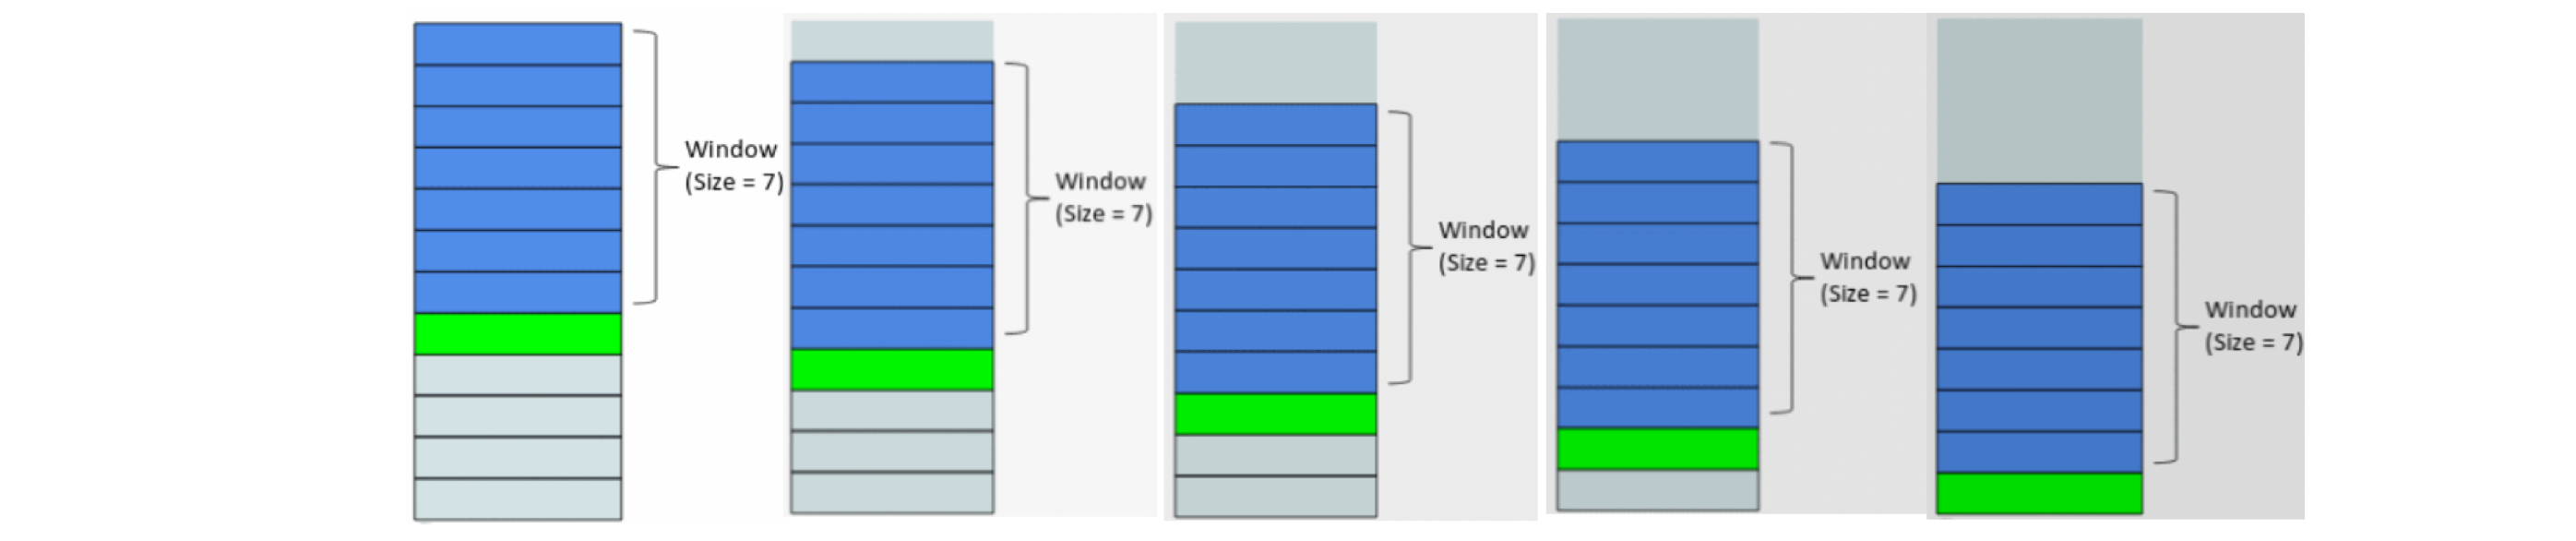

    Here, you have to calculate separately the 3, 6 and 12-month rolling window features (tables: **rolling_features_3M, rolling_features_6M, rolling_features_12M**) for every client that calculates the aggregations 'sum', 'mean' and 'max' for both columns 'mth_txn_amt_sum' and 'mth_txn_cnt'. The steps to achieve this with **base_clnt_mth** as the starting dataframe are:

    - groupby the client number
    - select the two columns you want to aggregate
    - use the rolling function with the appropriate windows
    - aggregate with 'sum', 'mean' and 'max'

In [32]:
# 3-month rolling window features
rolling_features_3M = base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum', 'mth_txn_cnt']].rolling(3).agg(
    {'mth_txn_amt_sum': ['sum', 'mean', 'max'], 'mth_txn_cnt': ['sum', 'mean', 'max']})

# 6-month rolling window features
rolling_features_6M = base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum', 'mth_txn_cnt']].rolling(6).agg(
    {'mth_txn_amt_sum': ['sum', 'mean', 'max'], 'mth_txn_cnt': ['sum', 'mean', 'max']})

# 12-month rolling window features
rolling_features_12M = base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum', 'mth_txn_cnt']].rolling(12).agg(
    {'mth_txn_amt_sum': ['sum', 'mean', 'max'], 'mth_txn_cnt': ['sum', 'mean', 'max']})

In [33]:
rolling_features_3M.head(15)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0
        157048           156.0  52.000000  96.0         2.0  0.666667  1.0
        157029            60.0  20.000000  60.0         1.0  0.333333  1.0
        157049            60.0  20.000000  60.0         1.0  0.333333  1.0
        157046             0.0   0.000000   0.0         0.0  0.000000  0.0
        157032             0.0   0.000000   0.0         0.0  0.000000  0.0
        157045             0.0   0.000000   0.0         0.0  0.000000  0.0
        157062            56.0  18.666667  56.0         1.0  0.333333  1.0
        157061            56.0  18.666667  56.0         1.0  0.333333  1.0
        157073           108.0  36.000000  56.0         2.0  0.666667  1.0
        157065           133.0  44.333333  81.0         2.0  0.666667  1.0

In [34]:
rolling_features_6M.head(15)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048           212.0  35.333333  96.0         3.0  0.500000  1.0
        157029           212.0  35.333333  96.0         3.0  0.500000  1.0
        157049           156.0  26.000000  96.0         2.0  0.333333  1.0
        157046           156.0  26.000000  96.0         2.0  0.333333  1.0
        157032            60.0  10.000000  60.0         1.0  0.166667  1.0
        157045            60.0  10.000000  60.0         1.0  0.166667  1.0
        157062            56.0   9.333333  56.0         1.0  0.166667  1.0
        157061            56.0   9.333333  56.0         1.0  0.166667  1.0
        157073           108.0  18.000000  56.0         2.0  0.333333  1.0
        157065           189.0  31.500000  81.0         3.0  0.500000  1.0

In [35]:
rolling_features_12M.head(15)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048             NaN        NaN   NaN         NaN       NaN  NaN
        157029             NaN        NaN   NaN         NaN       NaN  NaN
        157049             NaN        NaN   NaN         NaN       NaN  NaN
        157046             NaN        NaN   NaN         NaN       NaN  NaN
        157032             NaN        NaN   NaN         NaN       NaN  NaN
        157045             NaN        NaN   NaN         NaN       NaN  NaN
        157062           268.0  22.333333  96.0         4.0  0.333333  1.0
        157061           268.0  22.333333  96.0         4.0  0.333333  1.0
        157073           264.0  22.000000  96.0         4.0  0.333333  1.0
        157065           345.0  28.750000  96.0         5.0  0.416667  1.0

The output of the 3-month rolling window dataframe is shown below. Also, answer the following questions in the .ipynb notebook as Markdown comments.

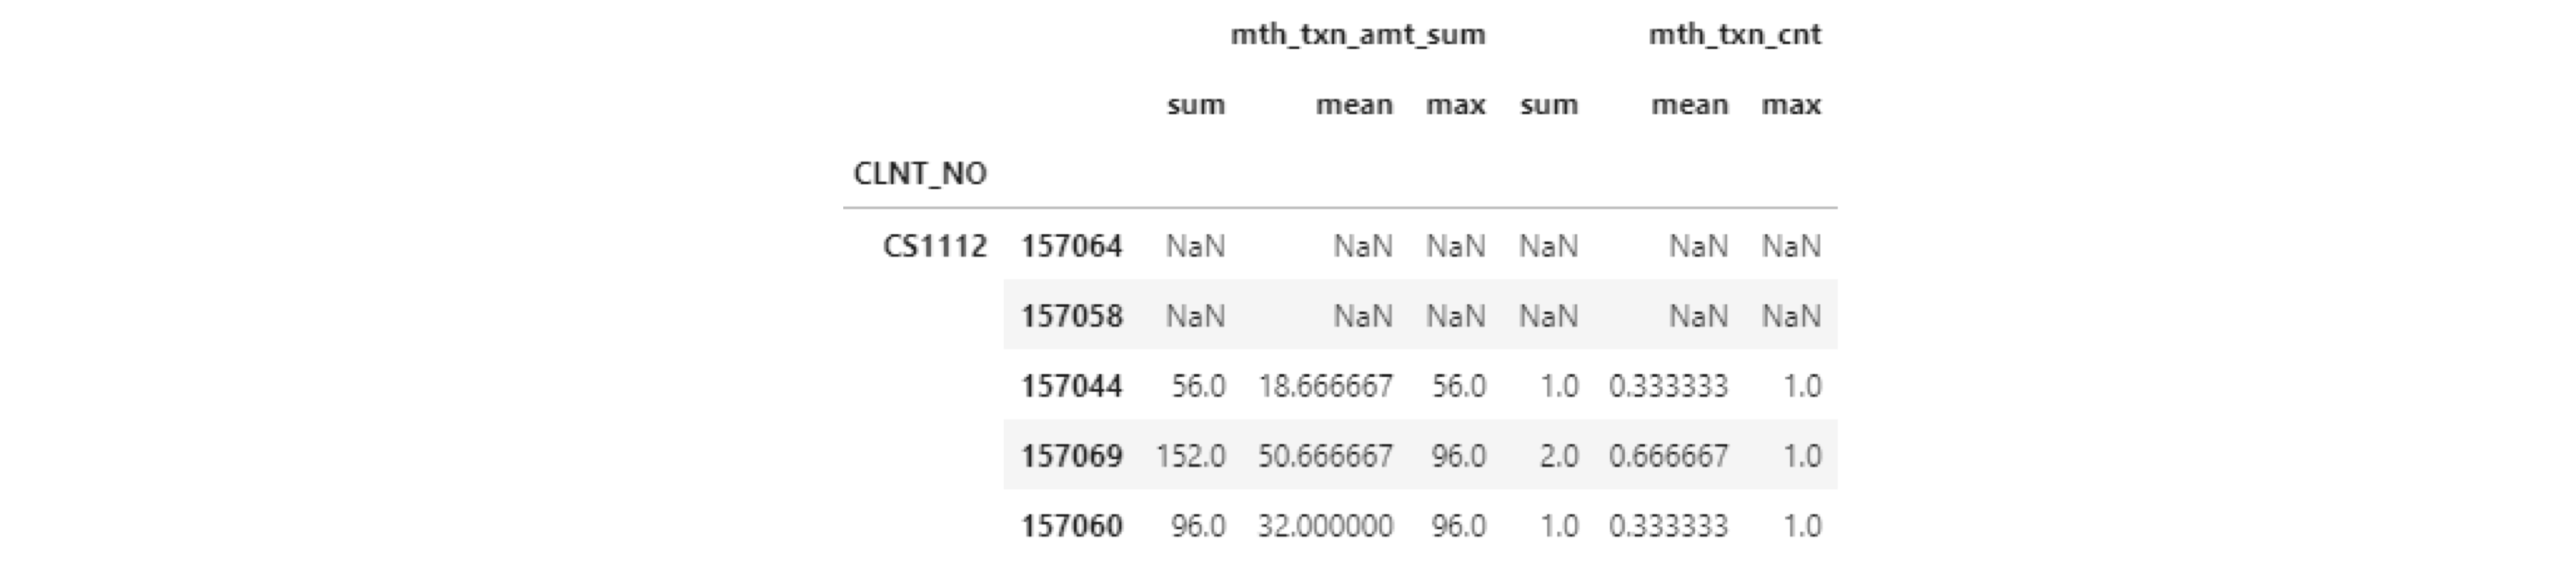

- How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear? **Answer: The rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows are 2, 5, 11 respectively. The NaN values appear because of not enough observations to obtain the rolling features. For example, for the 3-month windows, the minimum value of observations is 3, the first 2 rows appear with NaN values at the beginning of each client.**

- How many levels do the index and columns have? Are these MultiIndex dataframes? **Answer: Both index and columns have 2 levels. Therefore, these are MultiIndex dataframes.**

- Rename the columns as following: 'amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M' and follow the same naming convention for 6M and 12M.

In [36]:
# check number levels of the index and columns
index_levels = [rolling_features_3M.index.nlevels, rolling_features_6M.index.nlevels, rolling_features_12M.index.nlevels]
columns_levels = [rolling_features_3M.columns.nlevels, rolling_features_6M.columns.nlevels, rolling_features_12M.columns.nlevels]

# create dataframe
data = {'index_levels': index_levels, 'columns_levels': columns_levels}
df = pd.DataFrame(data=data, index=['rolling_features_3M', 'rolling_features_6M', 'rolling_features_12M'])
df

index_levels  columns_levels
rolling_features_3M              2               2
rolling_features_6M              2               2
rolling_features_12M             2               2

In [37]:
# rename columns
rolling_features_3M.columns = ['amt_sum_3M','amt_mean_3M','amt_max_3M', 'txn_cnt_sum_3M','txn_cnt_mean_3M','txn_cnt_max_3M']
rolling_features_6M.columns = ['amt_sum_6M','amt_mean_6M','amt_max_6M', 'txn_cnt_sum_6M','txn_cnt_mean_6M','txn_cnt_max_6M']
rolling_features_12M.columns = ['amt_sum_12M','amt_mean_12M','amt_max_12M', 'txn_cnt_sum_12M','txn_cnt_mean_12M','txn_cnt_max_12M']

#check dataframe of renamed columns
rolling_features_3M.head()

amt_sum_3M  amt_mean_3M  amt_max_3M  txn_cnt_sum_3M  \
CLNT_NO                                                               
CS1112  157064         NaN          NaN         NaN             NaN   
        157058         NaN          NaN         NaN             NaN   
        157044        56.0    18.666667        56.0             1.0   
        157069       152.0    50.666667        96.0             2.0   
        157060        96.0    32.000000        96.0             1.0   

                txn_cnt_mean_3M  txn_cnt_max_3M  
CLNT_NO                                          
CS1112  157064              NaN             NaN  
        157058              NaN             NaN  
        157044         0.333333             1.0  
        157069         0.666667             1.0  
        157060         0.333333             1.0

4. Merge the 4 tables: **base_clnt_mth, rolling_features_3M, rolling_features_6M, rolling_features_12M** in the output **all_rolling_features**. It is recommended to drop the level: 0 of the rolling features MultiIndex table and join with **base_clnt_mth** on the indexes.

    Make sure you understand why joining on the indexes preserves the CLNT NO and ME DT for each index.

In [38]:
rolling_features_3M_6M = pd.merge(rolling_features_3M, rolling_features_6M, 
                                  left_index=True, right_index=True)
rolling_features_3M_6M_12M = pd.merge(rolling_features_3M_6M, rolling_features_12M, 
                                      left_index=True, right_index=True)

rolling_features_3M_6M_12M.reset_index(level = 'CLNT_NO', inplace=True)
rolling_features_3M_6M_12M

CLNT_NO  amt_sum_3M  amt_mean_3M  amt_max_3M  txn_cnt_sum_3M  \
157064  CS1112         NaN          NaN         NaN             NaN   
157058  CS1112         NaN          NaN         NaN             NaN   
157044  CS1112        56.0    18.666667        56.0             1.0   
157069  CS1112       152.0    50.666667        96.0             2.0   
157060  CS1112        96.0    32.000000        96.0             1.0   
...        ...         ...          ...         ...             ...   
295140  CS9000         0.0     0.000000         0.0             0.0   
295126  CS9000         0.0     0.000000         0.0             0.0   
295119  CS9000         0.0     0.000000         0.0             0.0   
295136  CS9000        34.0    11.333333        34.0             1.0   
295114  CS9000        34.0    11.333333        34.0             1.0   

        txn_cnt_mean_3M  txn_cnt_max_3M  amt_sum_6M  amt_mean_6M  amt_max_6M  \
157064              NaN             NaN         NaN          NaN         NaN   
157058              NaN             NaN         NaN          NaN         NaN   
157044         0.333333             1.0         NaN          NaN         NaN   
157069         0.666667             1.0         NaN          NaN         NaN   
157060         0.333333             1.0         NaN          NaN         NaN   
...                 ...             ...         ...          ...         ...   
295140         0.000000             0.0        61.0    10.166667        35.0   
295126         0.000000             0.0        61.0    10.166667        35.0   
295119         0.000000             0.0        35.0     5.833333        35.0   
295136         0.333333             1.0        34.0     5.666667        34.0   
295114         0.333333             1.0        34.0     5.666667        34.0   

        txn_cnt_sum_6M  txn_cnt_mean_6M  txn_cnt_max_6M  amt_sum_12M  \
157064             NaN              NaN             NaN          NaN   
157058             NaN              NaN             NaN          NaN   
157044             NaN              NaN             NaN          NaN   
157069             NaN              NaN             NaN          NaN   
157060             NaN              NaN             NaN          NaN   
...                ...              ...             ...          ...   
295140             2.0         0.333333             1.0         97.0   
295126             2.0         0.333333             1.0         97.0   
295119             1.0         0.166667             1.0         81.0   
295136             1.0         0.166667             1.0        115.0   
295114             1.0         0.166667             1.0        115.0   

        amt_mean_12M  amt_max_12M  txn_cnt_sum_12M  txn_cnt_mean_12M  \
157064           NaN          NaN              NaN               NaN   
157058           NaN          NaN              NaN               NaN   
157044           NaN          NaN              NaN               NaN   
157069           NaN          NaN              NaN               NaN   
157060           NaN          NaN              NaN               NaN   
...              ...          ...              ...               ...   
295140      8.083333         35.0              4.0          0.333333   
295126      8.083333         35.0              4.0          0.333333   
295119      6.750000         35.0              3.0          0.250000   
295136      9.583333         35.0              4.0          0.333333   
295114      9.583333         35.0              4.0          0.333333   

        txn_cnt_max_12M  
157064              NaN  
157058              NaN  
157044              NaN  
157069              NaN  
157060              NaN  
...                 ...  
295140              1.0  
295126              1.0  
295119              1.0  
295136              1.0  
295114              1.0  

[323783 rows x 19 columns]

In [39]:
all_rolling_features = pd.merge(base_clnt_mth, rolling_features_3M_6M_12M.drop('CLNT_NO', axis = 1), 
                                left_index=True, right_index=True)
all_rolling_features

CLNT_NO      ME_DT  mth_txn_amt_sum  mth_txn_cnt  amt_sum_3M  \
157064  CS1112 2011-05-31              0.0          0.0         NaN   
157058  CS1112 2011-06-30             56.0          1.0         NaN   
157044  CS1112 2011-07-31              0.0          0.0        56.0   
157069  CS1112 2011-08-31             96.0          1.0       152.0   
157060  CS1112 2011-09-30              0.0          0.0        96.0   
...        ...        ...              ...          ...         ...   
295140  CS9000 2014-11-30              0.0          0.0         0.0   
295126  CS9000 2014-12-31              0.0          0.0         0.0   
295119  CS9000 2015-01-31              0.0          0.0         0.0   
295136  CS9000 2015-02-28             34.0          1.0        34.0   
295114  CS9000 2015-03-31              0.0          0.0        34.0   

        amt_mean_3M  amt_max_3M  txn_cnt_sum_3M  txn_cnt_mean_3M  \
157064          NaN         NaN             NaN              NaN   
157058          NaN         NaN             NaN              NaN   
157044    18.666667        56.0             1.0         0.333333   
157069    50.666667        96.0             2.0         0.666667   
157060    32.000000        96.0             1.0         0.333333   
...             ...         ...             ...              ...   
295140     0.000000         0.0             0.0         0.000000   
295126     0.000000         0.0             0.0         0.000000   
295119     0.000000         0.0             0.0         0.000000   
295136    11.333333        34.0             1.0         0.333333   
295114    11.333333        34.0             1.0         0.333333   

        txn_cnt_max_3M  ...  amt_max_6M  txn_cnt_sum_6M  txn_cnt_mean_6M  \
157064             NaN  ...         NaN             NaN              NaN   
157058             NaN  ...         NaN             NaN              NaN   
157044             1.0  ...         NaN             NaN              NaN   
157069             1.0  ...         NaN             NaN              NaN   
157060             1.0  ...         NaN             NaN              NaN   
...                ...  ...         ...             ...              ...   
295140             0.0  ...        35.0             2.0         0.333333   
295126             0.0  ...        35.0             2.0         0.333333   
295119             0.0  ...        35.0             1.0         0.166667   
295136             1.0  ...        34.0             1.0         0.166667   
295114             1.0  ...        34.0             1.0         0.166667   

        txn_cnt_max_6M  amt_sum_12M  amt_mean_12M  amt_max_12M  \
157064             NaN          NaN           NaN          NaN   
157058             NaN          NaN           NaN          NaN   
157044             NaN          NaN           NaN          NaN   
157069             NaN          NaN           NaN          NaN   
157060             NaN          NaN           NaN          NaN   
...                ...          ...           ...          ...   
295140             1.0         97.0      8.083333         35.0   
295126             1.0         97.0      8.083333         35.0   
295119             1.0         81.0      6.750000         35.0   
295136             1.0        115.0      9.583333         35.0   
295114             1.0        115.0      9.583333         35.0   

        txn_cnt_sum_12M  txn_cnt_mean_12M  txn_cnt_max_12M  
157064              NaN               NaN              NaN  
157058              NaN               NaN              NaN  
157044              NaN               NaN              NaN  
157069              NaN               NaN              NaN  
157060              NaN               NaN              NaN  
...                 ...               ...              ...  
295140              4.0          0.333333              1.0  
295126              4.0          0.333333              1.0  
295119              3.0          0.250000              1.0  
295136              4

5. Conﬁrm that your ﬁnal output **all_rolling_features** has 323,783 rows and 22 columns and save it as **mth_rolling_features.xlsx**.

In [40]:
print('The ﬁnal output all_rolling_features has {} rows and {} columns'.format(all_rolling_features.shape[0],
                                                                               all_rolling_features.shape[1]))

The ﬁnal output all_rolling_features has 323783 rows and 22 columns


In [41]:
# export to excel file
all_rolling_features.to_excel('mth_rolling_features.xlsx')  

### 1.6 Date-related features: date of the week

In this section, you will create the date-related features that capture information about the day of the week the transactions were performed.

1. The DatetimeIndex object you used earlier allows you to extract many components of a DateTime object. Here, you want to use the attributes **dt.dayofweek** and/or **dt.day_name()** to extract the day of the week from column 'txn_date' of the **txn** table (with Monday=0, Sunday=6). The expected output below shows both columns.

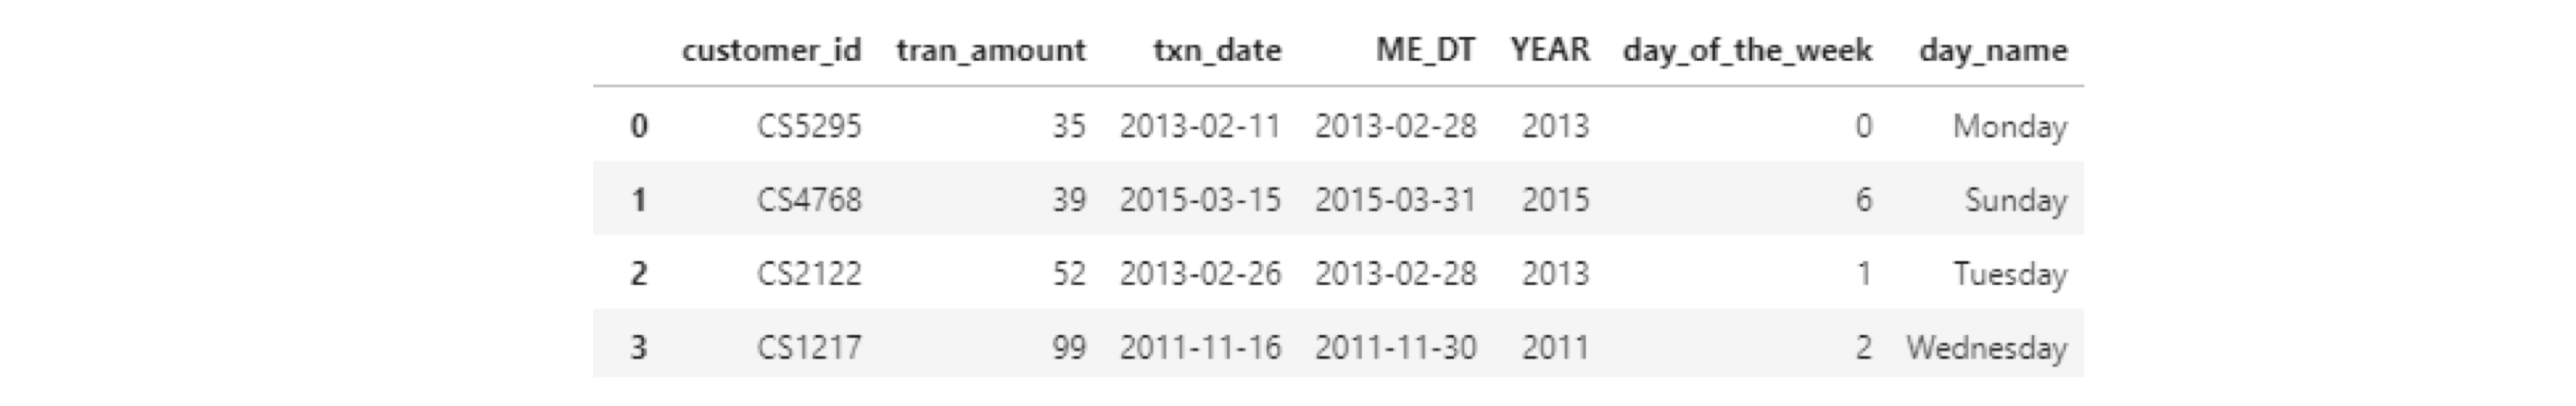

In [42]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn.head()

customer_id  tran_amount   txn_date      ME_DT  YEAR  day_of_the_week  \
0      CS5295           35 2013-02-11 2013-02-28  2013                0   
1      CS4768           39 2015-03-15 2015-03-31  2015                6   
2      CS2122           52 2013-02-26 2013-02-28  2013                1   
3      CS1217           99 2011-11-16 2011-11-30  2011                2   
4      CS1850           78 2013-11-20 2013-11-30  2013                2   

    day_name  
0     Monday  
1     Sunday  
2    Tuesday  
3  Wednesday  
4  Wednesday

2. Create the bar plot that shows the count of transactions per day of the week.

In [43]:
txn_barplot = txn.groupby(['day_name']).agg('count')
txn_barplot = txn_barplot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
txn_barplot

customer_id  tran_amount  txn_date  ME_DT   YEAR  day_of_the_week
day_name                                                                    
Monday           17885        17885     17885  17885  17885            17885
Tuesday          18031        18031     18031  18031  18031            18031
Wednesday        18028        18028     18028  18028  18028            18028
Thursday         17796        17796     17796  17796  17796            17796
Friday           17590        17590     17590  17590  17590            17590
Saturday         17929        17929     17929  17929  17929            17929
Sunday           17741        17741     17741  17741  17741            17741

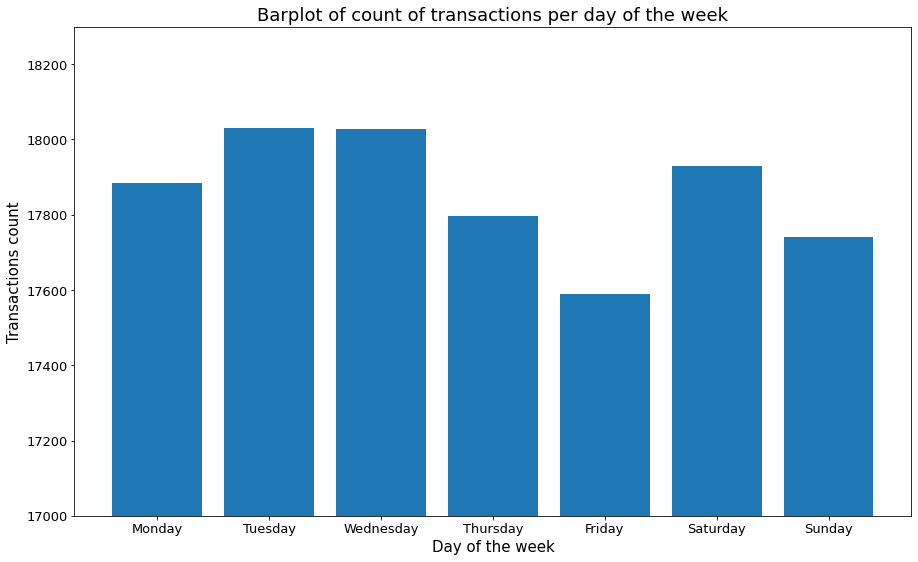

In [44]:
plt.figure(figsize=(15,9))
plt.bar(txn_barplot.index, txn_barplot['customer_id'])
plt.title("Barplot of count of transactions per day of the week", fontsize=18)
plt.xlabel("Day of the week",fontsize=15)
plt.ylabel("Transactions count", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(17000, 18300)
plt.show()

3. Following the same logic as in section 1.2, generate the features that capture the count of transactions per client, year and day of the week. The intermediate MultiIndex dataframe (with nlevels=3) and the ﬁnal pivoted output with a single index are shown in the snapshots below.

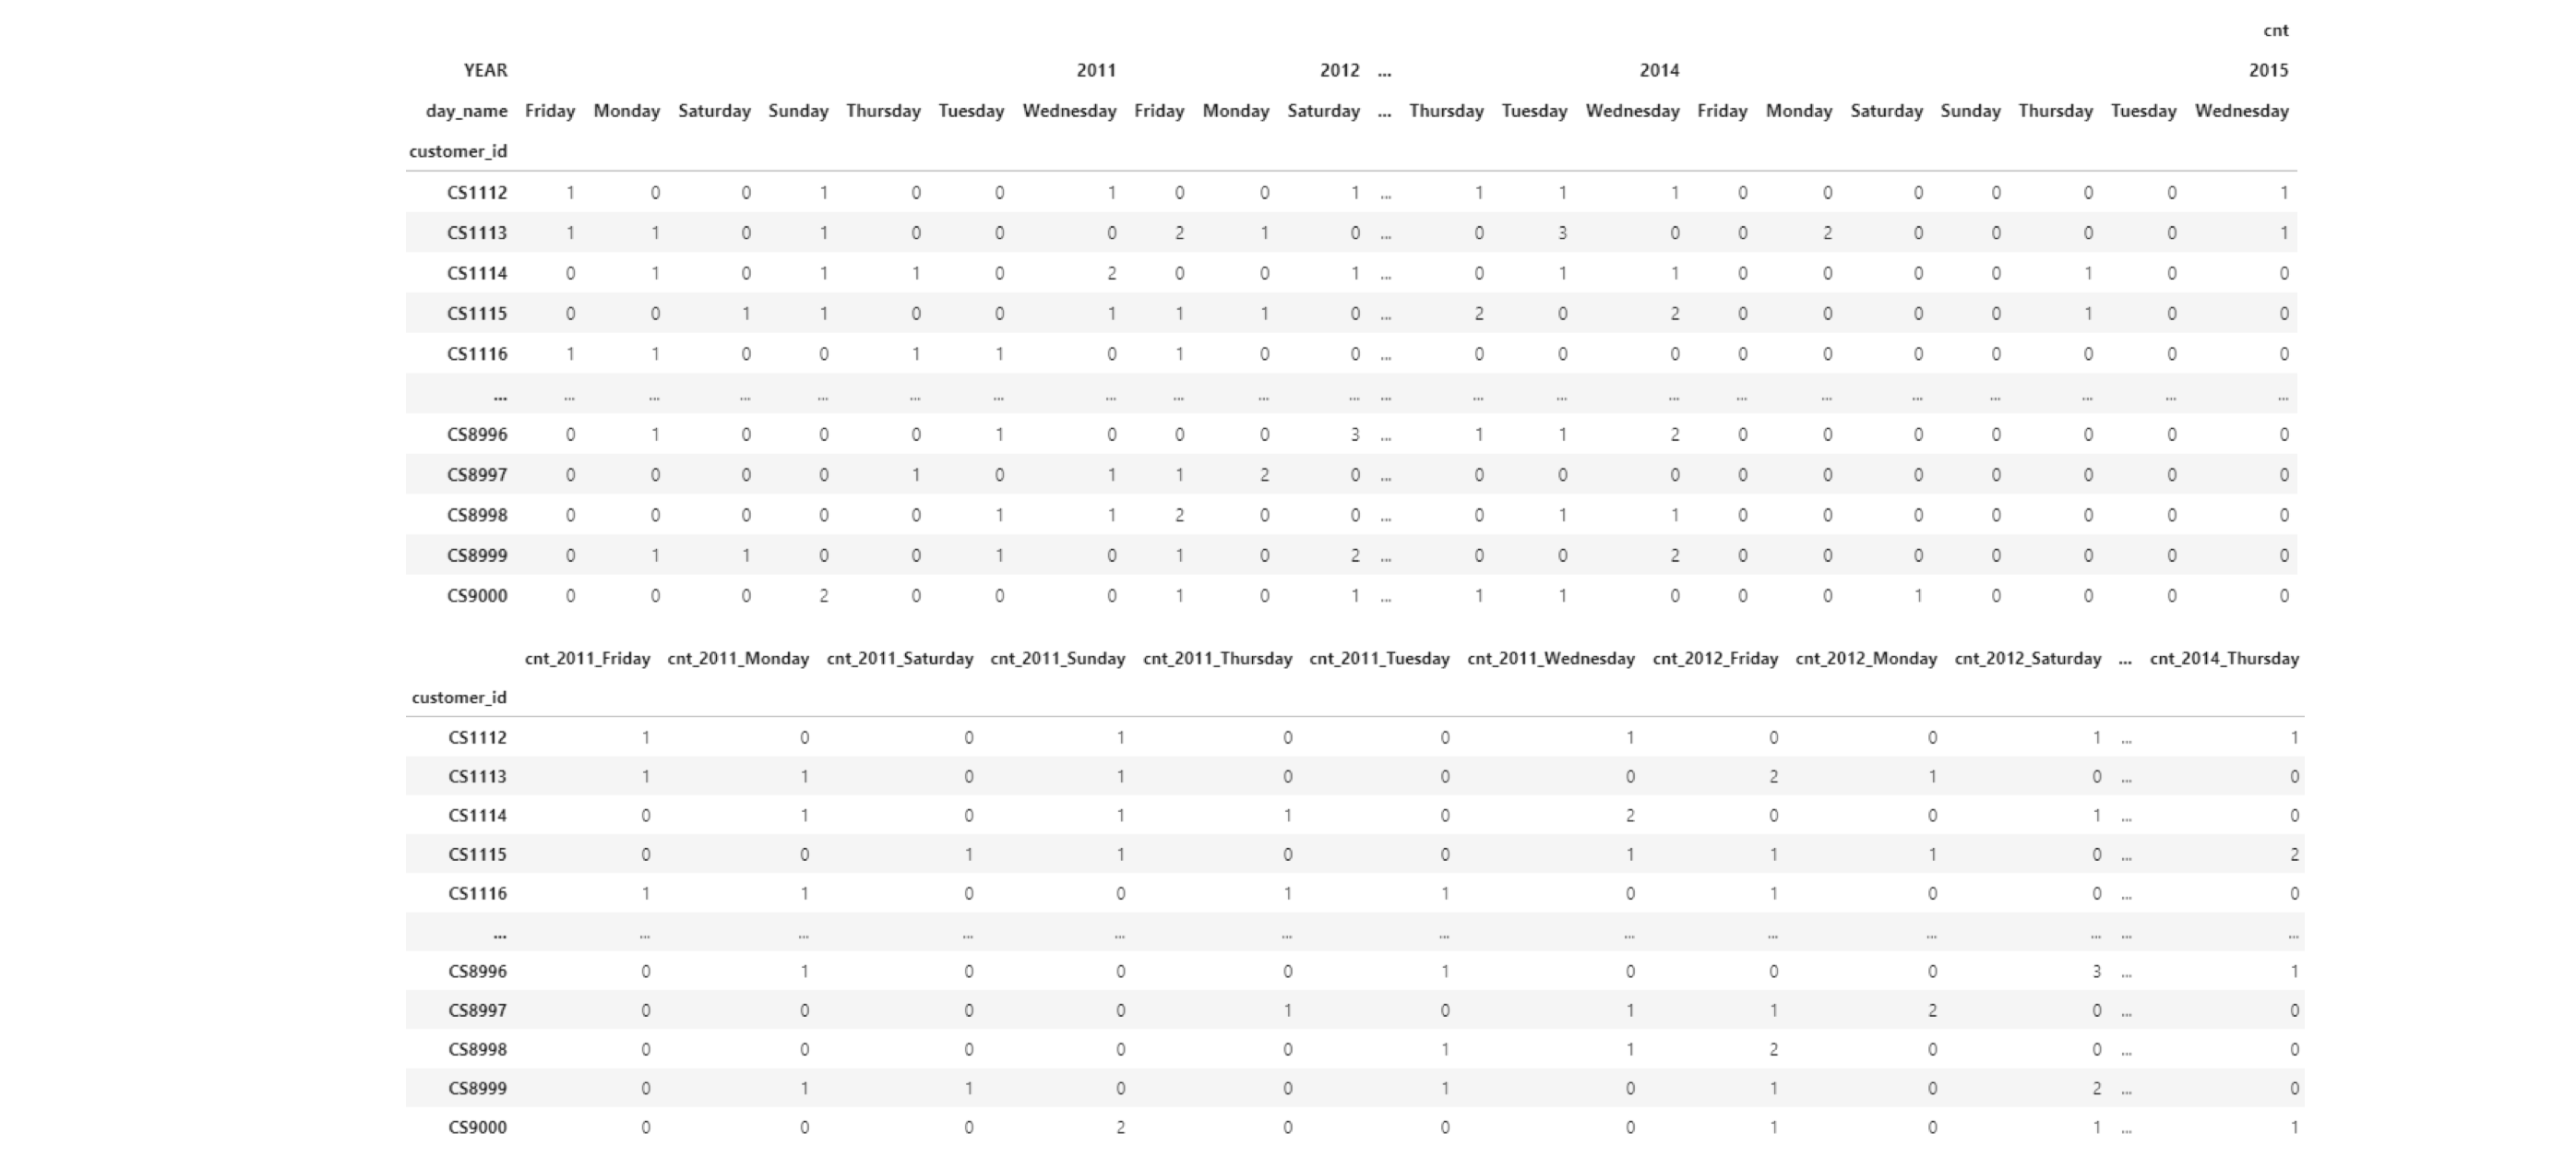

In [45]:
clnt_day_aggregations = txn.groupby(['customer_id', 'YEAR', 'day_name']).agg(cnt=pd.NamedAgg('tran_amount', 'count'))
clnt_day_aggregations_pivot = pd.pivot_table(clnt_day_aggregations, index = 'customer_id', 
                                         columns = ['YEAR', 'day_name'], 
                                         fill_value = 0)
clnt_day_aggregations_pivot

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996           0      1        0      0        0       1         0      0   
CS8997           0      0        0      0        1       0         1      1   
CS8998           0      0        0      0        0       1         1      2   
CS8999           0      1        1      0        0       1         0      1   
CS9000           0      0        0      2        0       0         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996           0        3  ...        1       1         2      0      0   
CS8997           2        0  ...        0       0         0      0      0   
CS8998           0        0  ...        0       1         1      0      0   
CS8999           0        2  ...        0       0         2      0      0   
CS9000           0        1  ...        1       1         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  
...              ...    ...      ...     ...       ...  
CS8996             0      0        0       0         0  
CS8997             0      0        0       0         0  
CS8998             0      0        0       0         0  
CS8999             0      0        0       0         0  
CS9000             1      0        0       0         0  

[6889 rows x 35 columns]

In [46]:
# convert three-level columns into single level column 
level_0 = clnt_day_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_day_aggregations_pivot.columns.get_level_values(1).astype(str)
level_2 = clnt_day_aggregations_pivot.columns.get_level_values(2).astype(str)
clnt_day_aggregations_pivot.columns = level_0 + '_' + level_1 + '_' + level_2
clnt_day_aggregations_pivot

cnt_2011_Friday  cnt_2011_Monday  cnt_2011_Saturday  \
customer_id                                                        
CS1112                     1                0                  0   
CS1113                     1                1                  0   
CS1114                     0                1                  0   
CS1115                     0                0                  1   
CS1116                     1                1                  0   
...                      ...              ...                ...   
CS8996                     0                1                  0   
CS8997                     0                0                  0   
CS8998                     0                0                  0   
CS8999                     0                1                  1   
CS9000                     0                0                  0   

             cnt_2011_Sunday  cnt_2011_Thursday  cnt_2011_Tuesday  \
customer_id                                                         
CS1112                     1                  0                 0   
CS1113                     1                  0                 0   
CS1114                     1                  1                 0   
CS1115                     1                  0                 0   
CS1116                     0                  1                 1   
...                      ...                ...               ...   
CS8996                     0                  0                 1   
CS8997                     0                  1                 0   
CS8998                     0                  0                 1   
CS8999                     0                  0                 1   
CS9000                     2                  0                 0   

             cnt_2011_Wednesday  cnt_2012_Friday  cnt_2012_Monday  \
customer_id                                                         
CS1112                        1                0                0   
CS1113                        0                2                1   
CS1114                        2                0                0   
CS1115                        1                1                1   
CS1116                        0                1                0   
...                         ...              ...              ...   
CS8996                        0                0                0   
CS8997                        1                1                2   
CS8998                        1                2                0   
CS8999                        0                1                0   
CS9000                        0                1                0   

             cnt_2012_Saturday  ...  cnt_2014_Thursday  cnt_2014_Tuesday  \
customer_id                     ...                                        
CS1112                       1  ...                  1                 1   
CS1113                       0  ...                  0                 3   
CS1114                       1  ...                  0                 1   
CS1115                       0  ...                  2                 0   
CS1116                       0  ...                  0                 0   
...                        ...  ...                ...               ...   
CS8996                       3  ...                  1                 1   
CS8997                       0  ...                  0                 0   
CS8998                       0  ...                  0                 1   
CS8999                       2  ...                  0                 0   
CS9000                       1  ...                  1                 1   

             cnt_2014_Wednesday  cnt_2015_Friday  cnt_2015_Monday  \
customer_id                                                         
CS1112                        1                0                0   
CS1113                        0                0                2   
CS1114                        1                0                0  

4. Conﬁrm that your output has the same number of rows as the ﬁnal output in section 1.2 and save it as **annual_day_of_week_counts_pivot.xlsx**. How many features/columns did you create in this section?

In [47]:
print('The number of rows in the pivoted output from section 1.2 is', clnt_annual_aggregations_pivot.shape[0])
print('The number of rows in the pivoted output in this section is', clnt_day_aggregations_pivot.shape[0])

print('\nThe number of features/columns created in this section is', clnt_day_aggregations_pivot.shape[1])

The number of rows in the pivoted output from section 1.2 is 6889
The number of rows in the pivoted output in this section is 6889

The number of features/columns created in this section is 35


In [48]:
# export to excel file
clnt_day_aggregations_pivot.to_excel('annual_day_of_week_counts_pivot.xlsx')

5. Similarly, generate the features that capture the count of transactions per client, month-end-date and day of the week. In contrast with the annual pivot table in the previous step, here you want to create the pivot with ['customer_id', 'ME_DT'] as index to obtain the following output dataframe.

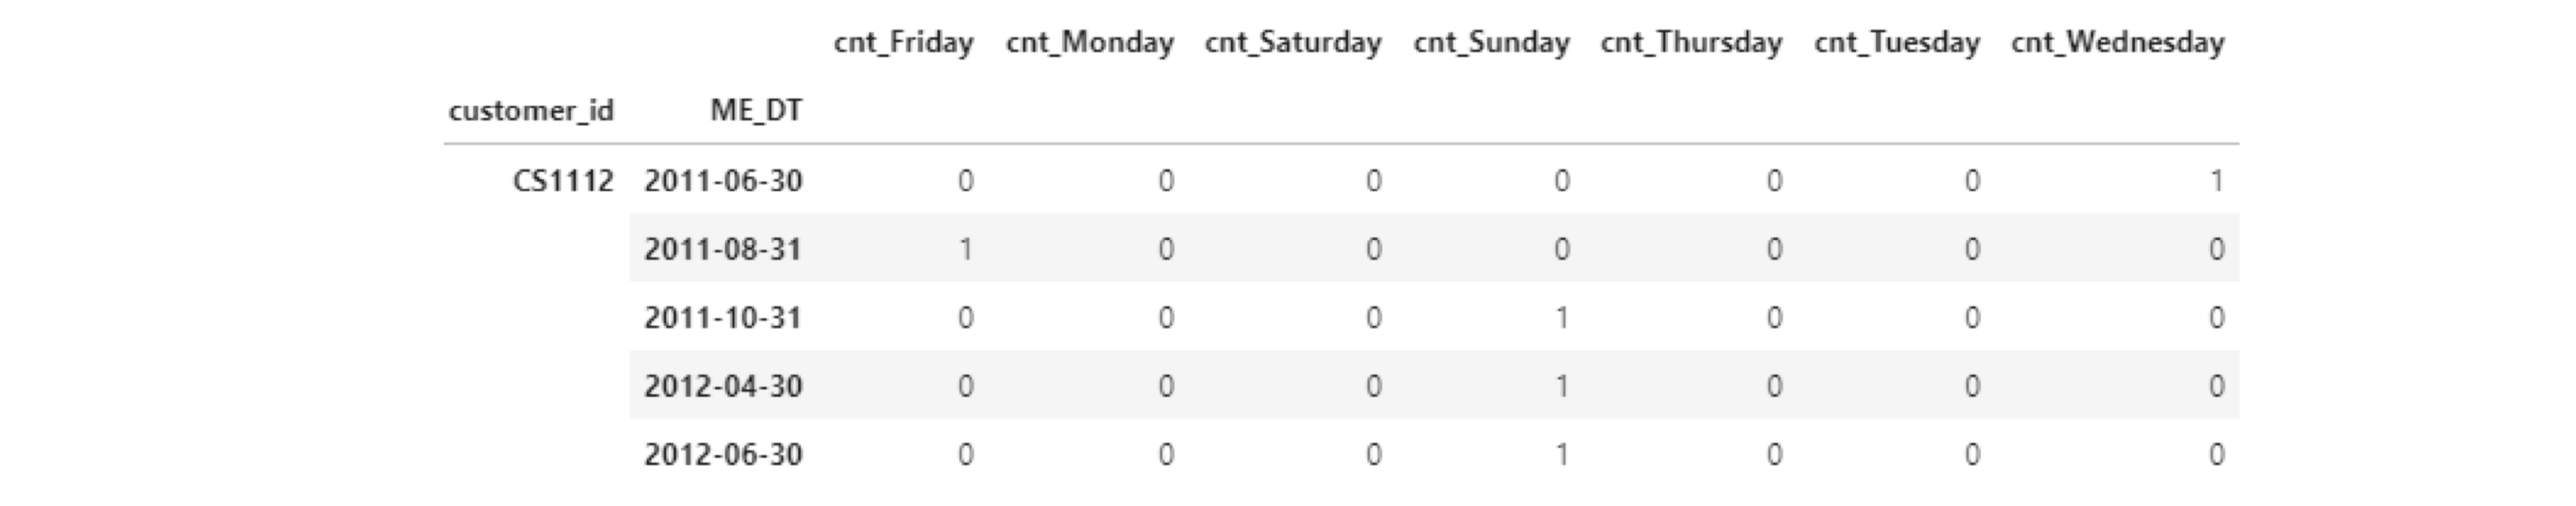

In [49]:
clnt_me_day_aggregations = txn.groupby(['customer_id', 'ME_DT', 'day_name']).agg(cnt = pd.NamedAgg('tran_amount', 'count'))
clnt_me_day_aggregations_pivot = pd.pivot_table(clnt_me_day_aggregations, index = ['customer_id', 'ME_DT'], columns = 'day_name', fill_value = 0)
clnt_me_day_aggregations_pivot

cnt                                          \
day_name               Friday Monday Saturday Sunday Thursday Tuesday   
customer_id ME_DT                                                       
CS1112      2011-06-30      0      0        0      0        0       0   
            2011-08-31      1      0        0      0        0       0   
            2011-10-31      0      0        0      1        0       0   
            2012-04-30      0      0        0      1        0       0   
            2012-06-30      0      0        0      1        0       0   
...                       ...    ...      ...    ...      ...     ...   
CS9000      2014-01-31      0      0        0      1        0       0   
            2014-05-31      0      0        0      0        1       0   
            2014-07-31      0      0        0      0        0       1   
            2014-08-31      0      0        0      1        0       0   
            2015-02-28      0      0        1      0        0       0   

                                  
day_name               Wednesday  
customer_id ME_DT                 
CS1112      2011-06-30         1  
            2011-08-31         0  
            2011-10-31         0  
            2012-04-30         0  
            2012-06-30         0  
...                          ...  
CS9000      2014-01-31         0  
            2014-05-31         0  
            2014-07-31         0  
            2014-08-31         0  
            2015-02-28         0  

[103234 rows x 7 columns]

In [50]:
# convert two-level columns into single level
level_0 = clnt_me_day_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_me_day_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_me_day_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_me_day_aggregations_pivot

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   
...                            ...         ...           ...         ...   
CS9000      2014-01-31           0           0             0           1   
            2014-05-31           0           0             0           0   
            2014-07-31           0           0             0           0   
            2014-08-31           0           0             0           1   
            2015-02-28           0           0             1           0   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0  
...                              ...          ...            ...  
CS9000      2014-01-31             0            0              0  
            2014-05-31             1            0              0  
            2014-07-31             0            1              0  
            2014-08-31             0            0              0  
            2015-02-28             0            0              0  

[103234 rows x 7 columns]

6. Join with **base_table_pd** as you did in section 1.5 and impute with your choice of value for NaN. Save the ﬁnal output as **mth_day_counts.xlxs**.

    **Answer:** Fill the NaN values with the value of 0 as the customer does not have any transaction on certain day of a week.

In [51]:
# rename index
clnt_me_day_aggregations_pivot.index.names = ['CLNT_NO', 'ME_DT']

# left merge the two tables
base_clnt_mth_day = base_table_pd.merge(clnt_me_day_aggregations_pivot, how='left', on=['CLNT_NO', 'ME_DT'])

# fill NaN values with 0
base_clnt_mth_day.fillna(0, inplace = True)
base_clnt_mth_day

CLNT_NO      ME_DT  cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
0       CS5295 2013-02-28         0.0         1.0           0.0         0.0   
1       CS5295 2015-03-31         0.0         0.0           0.0         0.0   
2       CS5295 2011-11-30         0.0         1.0           0.0         0.0   
3       CS5295 2013-11-30         0.0         0.0           0.0         0.0   
4       CS5295 2014-03-31         0.0         0.0           0.0         0.0   
...        ...        ...         ...         ...           ...         ...   
323778  CS8077 2011-08-31         0.0         0.0           0.0         1.0   
323779  CS8077 2012-09-30         0.0         0.0           0.0         0.0   
323780  CS8077 2014-09-30         0.0         0.0           0.0         0.0   
323781  CS8077 2014-02-28         0.0         0.0           0.0         0.0   
323782  CS8077 2012-06-30         0.0         0.0           0.0         0.0   

        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
0                0.0          0.0            0.0  
1                0.0          0.0            0.0  
2                0.0          0.0            1.0  
3                0.0          0.0            0.0  
4                0.0          0.0            0.0  
...              ...          ...            ...  
323778           0.0          0.0            0.0  
323779           0.0          0.0            0.0  
323780           0.0          0.0            0.0  
323781           0.0          0.0            0.0  
323782           0.0          0.0            0.0  

[323783 rows x 9 columns]

In [52]:
# export to excel file
base_clnt_mth_day.to_excel("mth_day_counts.xlsx")  

### 1.7 Date-related features: days since last transaction

In this date-related features set, you want to capture the frequency of the transactions in terms of the days since the last transaction. This set of features applies only to the monthly features.

1. The starting point is again the **txn** table. Recall that most clients have a single purchase per month, but some clients have multiple purchases in a month. Since you want to calculate the "days since last transaction", you want to capture the last transaction in a month for every client.

    Use the appropriate groupby to create the table **last_monthly_purchase** that captures the last 'txn_date' (aggfunc=max) for every client and month.

In [53]:
# construct the aggregation table reflecting the last monthly purchase for each client and month
last_monthly_purchase = txn.groupby(['customer_id', 'ME_DT']).agg(last_monthly_purchase=pd.NamedAgg(column='txn_date', aggfunc='max'))
last_monthly_purchase

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24
...                                      ...
CS9000      2014-01-31            2014-01-12
            2014-05-31            2014-05-08
            2014-07-31            2014-07-08
            2014-08-31            2014-08-24
            2015-02-28            2015-02-28

[103234 rows x 1 columns]

2. Join **base_table_pd** with **last_monthly_purchase** as you did in section 1.5. The snapshot below shows the output of the created object **last_monthly_purchase** base for client CS1112 who made her/his ﬁrst purchase on June 2011, then no purchase on July and made a purchase again on August 2011. What values will you use to impute the NaT values here? NaT stands for "Not a Timestamp".

    **Answer:** I will use the last monthly purchase values to impute the NaT values here. The last purchase date from previous month would be used to fill the NaT values if the customer doesnn't have transaction histories on certain month. However, we can keep the NaT values for the months that does not have any transaction before.

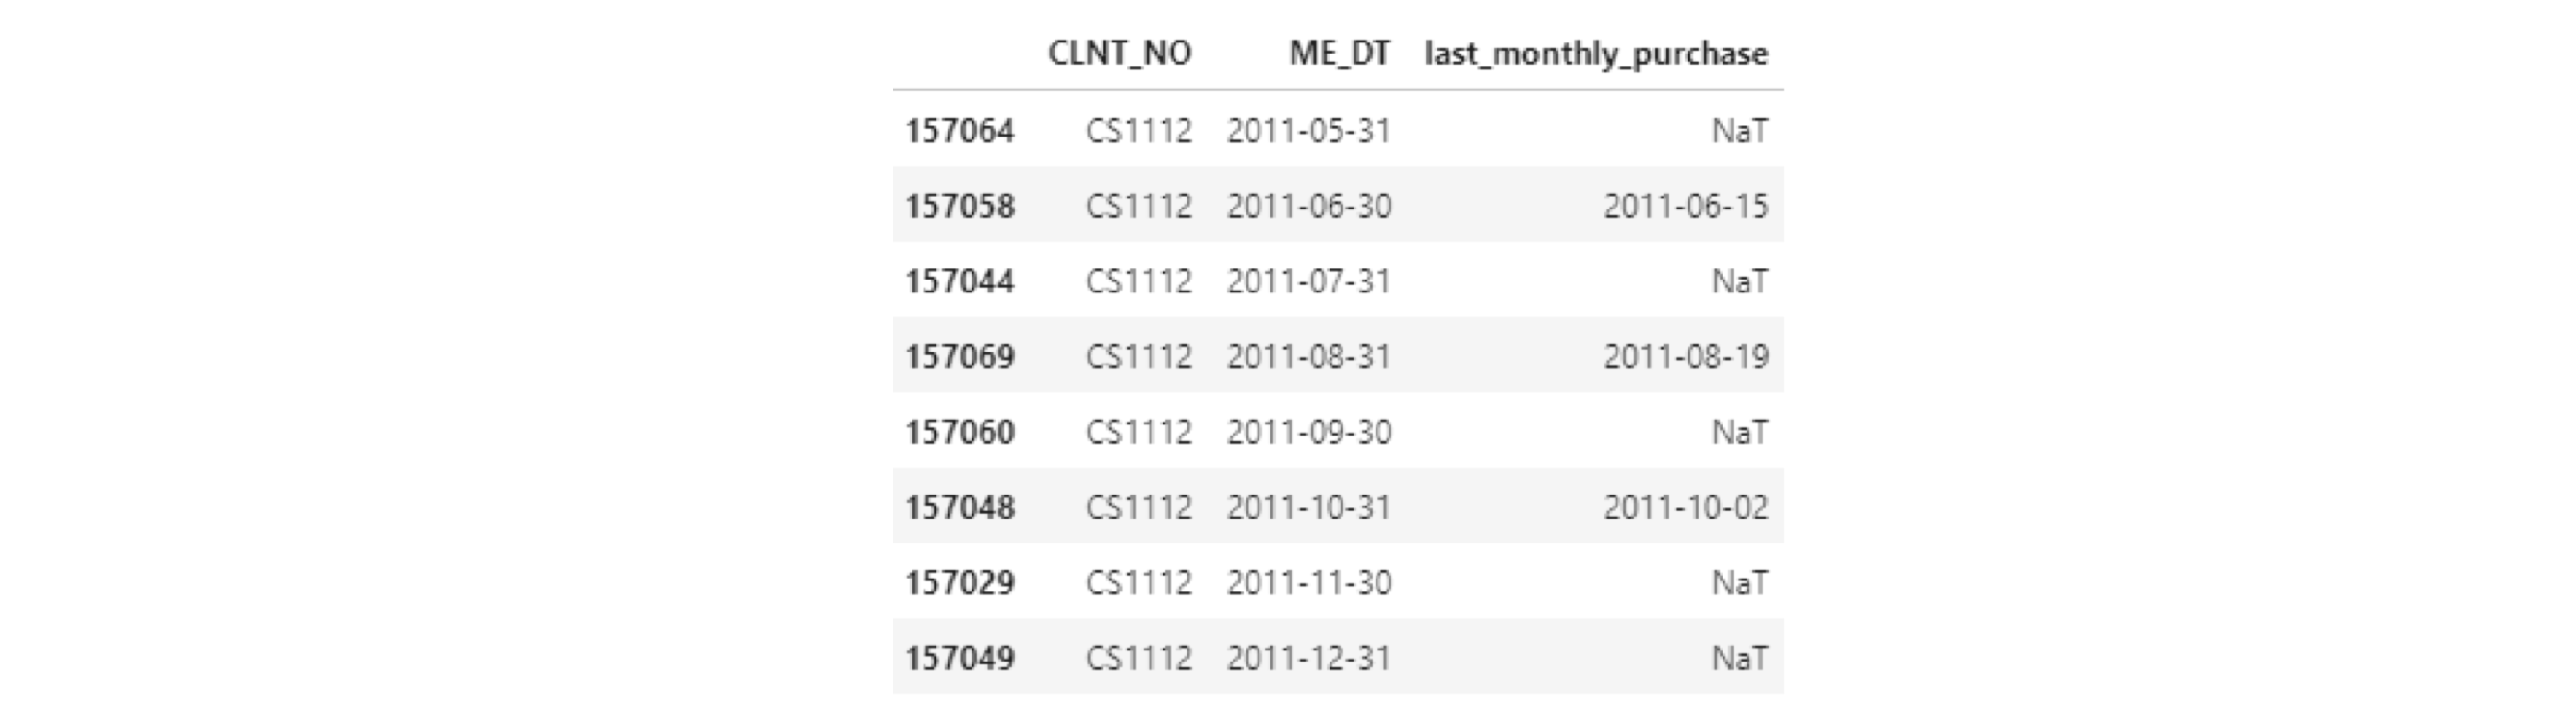

In [54]:
# rename index
last_monthly_purchase.index.names = ['CLNT_NO', 'ME_DT']

# left merge the two tables
base_last_monthly_purchase = base_table_pd.merge(last_monthly_purchase, how='left', on=['CLNT_NO', 'ME_DT'])

# sort the data by 'CLNT_NO' first then by 'ME_DT'
base_last_monthly_purchase.sort_values(['CLNT_NO', 'ME_DT'], inplace = True)
base_last_monthly_purchase

CLNT_NO      ME_DT last_monthly_purchase
157064  CS1112 2011-05-31                   NaT
157058  CS1112 2011-06-30            2011-06-15
157044  CS1112 2011-07-31                   NaT
157069  CS1112 2011-08-31            2011-08-19
157060  CS1112 2011-09-30                   NaT
...        ...        ...                   ...
295140  CS9000 2014-11-30                   NaT
295126  CS9000 2014-12-31                   NaT
295119  CS9000 2015-01-31                   NaT
295136  CS9000 2015-02-28            2015-02-28
295114  CS9000 2015-03-31                   NaT

[323783 rows x 3 columns]

3. To answer the imputation problem, we have to think what value should we use for say July 2011 for 'last_monthly_purchase'? The answer is that in July the value for the last monthly purchase is the previous line value: 2011-06-15. In other words, for every client we want to forward-ﬁll the NaT values.

    While pandas ﬁllna() method has a method to forward-ﬁll, here we want to use the apply and a lambda function with the forward-ﬁll function ﬃll(), with the following expression: `.apply(lambda x: x.ffill())` applied on object **last_monthly_purchase** base grouped by CLNT_NO. Below, I am showing a snapshot for lines [92:98] that conﬁrm the transition between clients CS1113 and CS1114.

    You can also recreate the forward-ﬁll with the ﬁllna() method, however there is a disadvantage and a reason the `.apply()` method is preferred here.

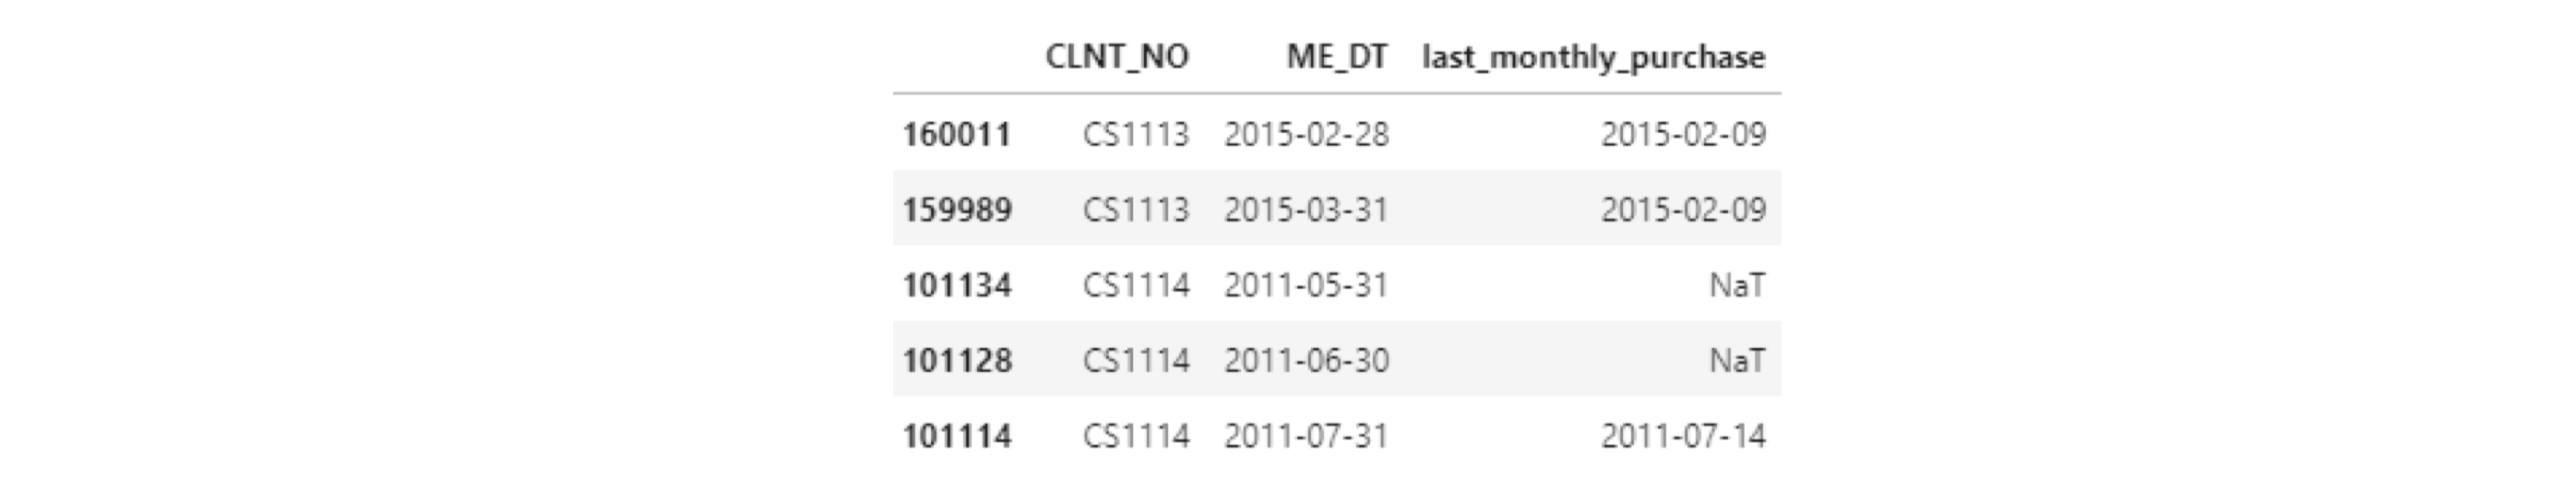

   
The forward-ﬁll on the grouped by CLNT_NO object is expected to leave NaT values for the ﬁrst months of every client until they purchase something. The above snapshot conﬁrms that for client CS1114.

In [55]:
# rows[92:98] without forward-fill
base_last_monthly_purchase[92:98]

CLNT_NO      ME_DT last_monthly_purchase
160011  CS1113 2015-02-28            2015-02-09
159989  CS1113 2015-03-31                   NaT
101134  CS1114 2011-05-31                   NaT
101128  CS1114 2011-06-30                   NaT
101114  CS1114 2011-07-31            2011-07-14
101139  CS1114 2011-08-31            2011-08-24

In [56]:
# fill the NaT values using forward-fill
base_last_monthly_purchase = base_last_monthly_purchase.groupby('CLNT_NO').apply(lambda x: x.ffill())

# rows[92:98] with forward-fill
base_last_monthly_purchase[92:98]

CLNT_NO      ME_DT last_monthly_purchase
160011  CS1113 2015-02-28            2015-02-09
159989  CS1113 2015-03-31            2015-02-09
101134  CS1114 2011-05-31                   NaT
101128  CS1114 2011-06-30                   NaT
101114  CS1114 2011-07-31            2011-07-14
101139  CS1114 2011-08-31            2011-08-24

4. Subtract the two date columns and convert the output to .dt.days to calculate the column 'days_since_last_txn' as shown in the following snapshot.

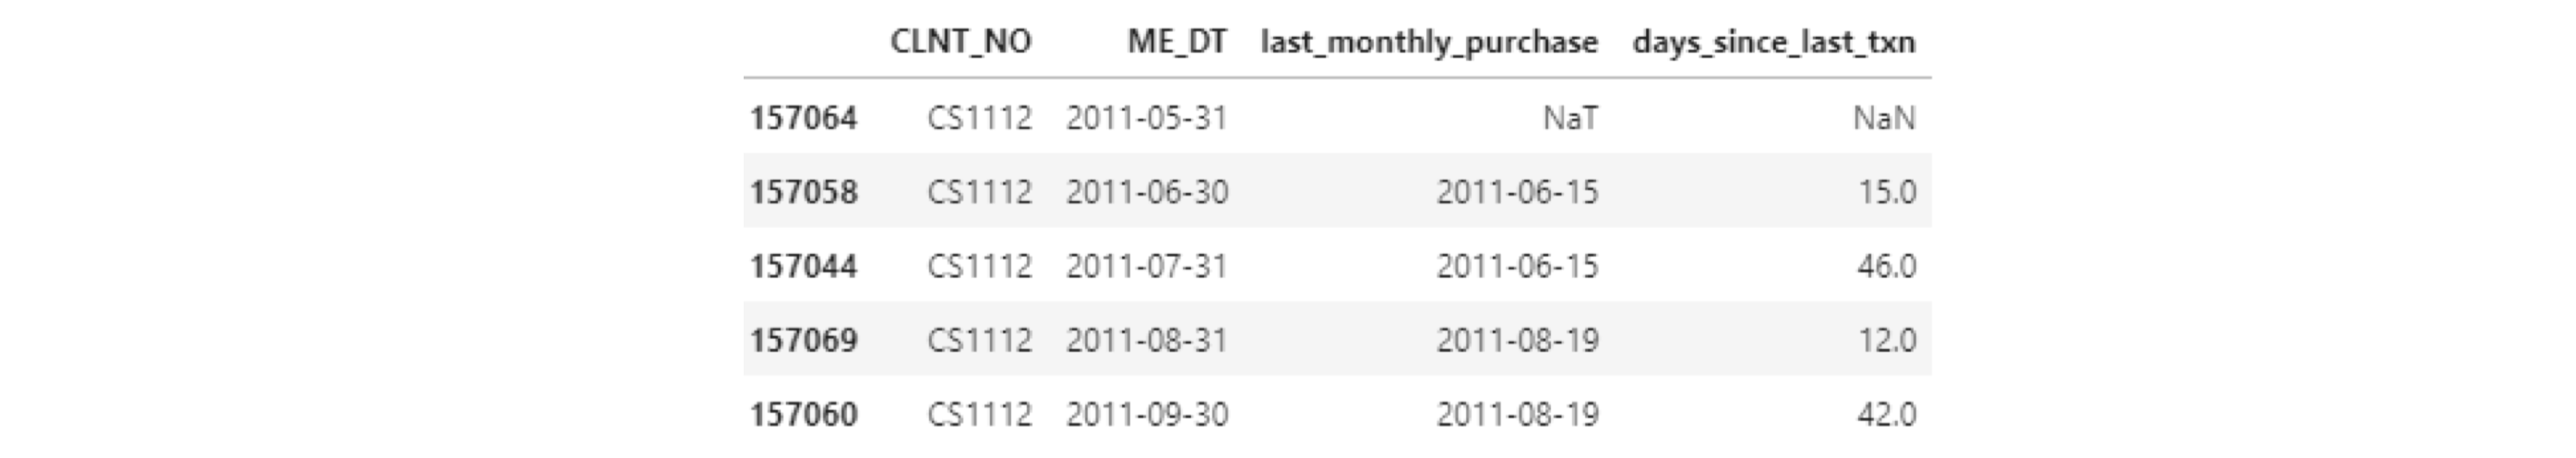

In [57]:
# calculate the number of days since last transaction by subtracting last purchase date from month end date
base_last_monthly_purchase['days_since_last_txn'] = base_last_monthly_purchase['ME_DT'] - base_last_monthly_purchase['last_monthly_purchase']
base_last_monthly_purchase['days_since_last_txn'] = base_last_monthly_purchase['days_since_last_txn'].dt.days
base_last_monthly_purchase.head()

CLNT_NO      ME_DT last_monthly_purchase  days_since_last_txn
157064  CS1112 2011-05-31                   NaT                  NaN
157058  CS1112 2011-06-30            2011-06-15                 15.0
157044  CS1112 2011-07-31            2011-06-15                 46.0
157069  CS1112 2011-08-31            2011-08-19                 12.0
157060  CS1112 2011-09-30            2011-08-19                 42.0

5. Plot a histogram of the 'days_since_last_txn'. Based on the values you observe in the histogram, impute the remaining NaN values (i.e. for the initial months before a client makes a purchase). Save the columns ['CLNT_NO', 'ME_DT', 'days_since_last_txn'] as **days_since_last_txn.xlsx**.

    **Answer:** In the histogram, I observe that most "days since last transaction" locates at the first bar (a very short period of time that is close to 0). Therefore, I impute the remaining NaN values with 0 for a client does not make a purchase before.

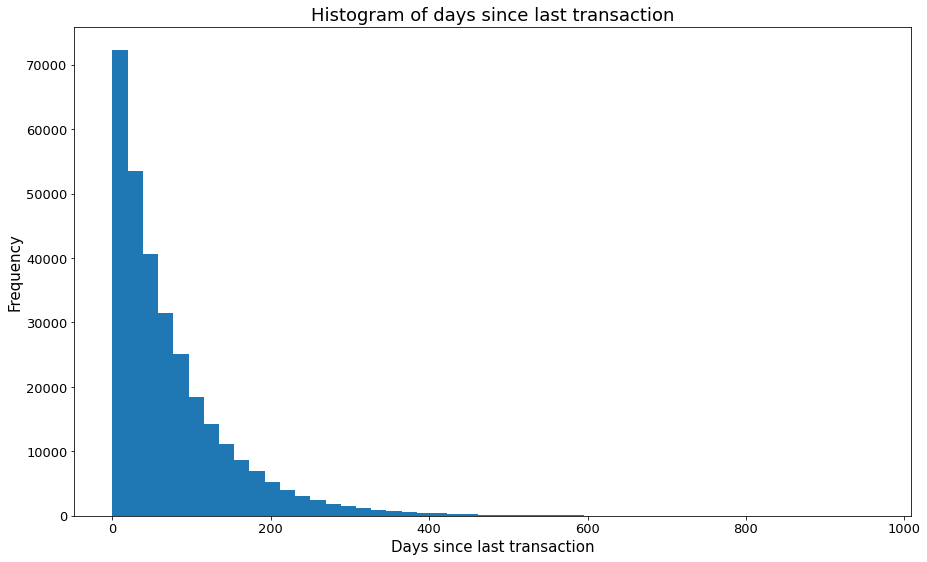

In [58]:
plt.figure(figsize=(15,9))
plt.hist(base_last_monthly_purchase['days_since_last_txn'], bins=50)
plt.title("Histogram of days since last transaction", fontsize=18)
plt.xlabel("Days since last transaction",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [59]:
# impute the remaining NaN values with 0
base_last_monthly_purchase['days_since_last_txn'].fillna(value=0, inplace=True)
base_last_monthly_purchase

CLNT_NO      ME_DT last_monthly_purchase  days_since_last_txn
157064  CS1112 2011-05-31                   NaT                  0.0
157058  CS1112 2011-06-30            2011-06-15                 15.0
157044  CS1112 2011-07-31            2011-06-15                 46.0
157069  CS1112 2011-08-31            2011-08-19                 12.0
157060  CS1112 2011-09-30            2011-08-19                 42.0
...        ...        ...                   ...                  ...
295140  CS9000 2014-11-30            2014-08-24                 98.0
295126  CS9000 2014-12-31            2014-08-24                129.0
295119  CS9000 2015-01-31            2014-08-24                160.0
295136  CS9000 2015-02-28            2015-02-28                  0.0
295114  CS9000 2015-03-31            2015-02-28                 31.0

[323783 rows x 4 columns]

In [60]:
# export to excel file
base_last_monthly_purchase[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel('days_since_last_txn.xlsx')